## Samsung Health Data:

### The notebook has been organized in the follwing manner:
1. Data cleaning
2. Data preprocessing
3. Distributions and trends in the individual datasets
4. Merged datasets analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.mlab as mlab
import calmap

import warnings
warnings.filterwarnings("ignore")

In [2]:
sleep_df = pd.read_csv("./sleep-export2.csv")
exercise_df = pd.read_csv("./exercise.csv")
floor_df = pd.read_csv("./floors_climbed.csv")
heart_rate_df = pd.read_csv("./heart_rate.csv")
step_df = pd.read_csv("./step_count.csv")

### 1. Data Cleaning

### 1.1. Sleep Data Cleanup

In [3]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
Unnamed: 0                              279 non-null int64
efficiency                              279 non-null float64
has_sleep_data                          277 non-null float64
com.samsung.health.sleep.datauuid       279 non-null object
quality                                 38 non-null float64
com.samsung.health.sleep.custom         0 non-null float64
com.samsung.health.sleep.end_time       279 non-null int64
original_wake_up_time                   36 non-null float64
com.samsung.health.sleep.start_time     279 non-null int64
com.samsung.health.sleep.time_offset    279 non-null object
com.samsung.health.sleep.update_time    279 non-null int64
original_bed_time                       36 non-null float64
com.samsung.health.sleep.create_time    279 non-null int64
original_efficiency                     36 non-null float64
dtypes: float64(7), int64(5), object(2)
memory usage: 30.6+

In [4]:
sleep_df.head()

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.66304
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,1519565416332,NaN,1519565416332,NaN
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,1527932972094,NaN,1527932972094,NaN
3,3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,NaN,NaN,1529749920000,NaN,1529735940000,UTC-0300,1529750846337,NaN,1529750846337,NaN
4,4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,NaN,NaN,1515159660000,NaN,1515128040000,UTC-0400,1515159899850,NaN,1515159899850,NaN


#### From the info we see:
- There is an 'Unnamed: 0' column which we will drop
- The com.samsung.health.sleep.custom' column has zero enteries
- The 'quality' column has just 38 non-null entries
- The 'original_wake_up_time', 'original_bed_time' and 'original_efficiency' columns have only 36 non-null entries

#### We will therefore drop the above columns from the dataframe                        

In [5]:
sleep_df.drop(['Unnamed: 0',\
                        'com.samsung.health.sleep.custom',\
                        'quality',\
                        'original_wake_up_time',\
                        'original_bed_time',\
                        'original_efficiency'], axis=1, inplace=True)

In [6]:
sleep_df.head()

,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,com.samsung.health.sleep.end_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,com.samsung.health.sleep.create_time
0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,1520501400000,1520479380000,UTC-0400,1520516398387,1520501522181
1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,1519565280000,1519539300000,UTC-0400,1519565416332,1519565416332
2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,1527932940000,1527910620000,UTC-0300,1527932972094,1527932972094
3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,1529749920000,1529735940000,UTC-0300,1529750846337,1529750846337
4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,1515159660000,1515128040000,UTC-0400,1515159899850,1515159899850


In [7]:
# Renaming the columns for consistency with the subsequent dataframe (execise_df, heart_rate_df, floor_df, step_df)
sleep_df.columns = ['efficiency', 'has_sleep_data', 'datauuid', 'end_time', \
                    'start_time', 'time_offset', 'update_time', 'create_time' ]

In [8]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
efficiency        279 non-null float64
has_sleep_data    277 non-null float64
datauuid          279 non-null object
end_time          279 non-null int64
start_time        279 non-null int64
time_offset       279 non-null object
update_time       279 non-null int64
create_time       279 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.5+ KB


#### From the info we see there are 2 enteries in 'has_sleep_data' colum that has null values. We will filter out those two rows to get the clean dataset

In [9]:
sleep_df = sleep_df[pd.notnull(sleep_df['has_sleep_data'])]
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 278
Data columns (total 8 columns):
efficiency        277 non-null float64
has_sleep_data    277 non-null float64
datauuid          277 non-null object
end_time          277 non-null int64
start_time        277 non-null int64
time_offset       277 non-null object
update_time       277 non-null int64
create_time       277 non-null int64
dtypes: float64(2), int64(4), object(2)
memory usage: 19.5+ KB


In [10]:
sleep_df.head()

,efficiency,has_sleep_data,datauuid,end_time,start_time,time_offset,update_time,create_time
0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,1520501400000,1520479380000,UTC-0400,1520516398387,1520501522181
1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,1519565280000,1519539300000,UTC-0400,1519565416332,1519565416332
2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,1527932940000,1527910620000,UTC-0300,1527932972094,1527932972094
3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,1529749920000,1529735940000,UTC-0300,1529750846337,1529750846337
4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,1515159660000,1515128040000,UTC-0400,1515159899850,1515159899850


### 1.2. Excercise Data Cleanup

In [11]:
exercise_df.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,2018-04-07 17:40:40.673,NaN,NaN,2018-04-07 17:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
1,1,2018-01-27 10:08:00.000,NaN,NaN,2018-01-27 09:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.000,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225
2,2,2018-05-01 18:12:20.915,NaN,NaN,2018-05-01 18:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,0.0,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
3,3,2018-02-24 13:50:02.929,NaN,NaN,2018-02-24 13:35:13.243,NaN,NaN,NaN,889686,F/D7+hL5E5,...,0.0,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...,NaN,NaN,NaN,NaN,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1,2018-02-24 13:52:08.229
4,4,2018-03-16 17:25:39.584,NaN,NaN,2018-03-16 17:15:20.192,NaN,NaN,NaN,619392,F/D7+hL5E5,...,0.0,NaN,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,NaN,NaN,NaN,NaN,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581


In [12]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 39 columns):
Unnamed: 0               341 non-null int64
end_time                 341 non-null object
altitude_loss            7 non-null float64
max_altitude             10 non-null float64
start_time               341 non-null object
count                    36 non-null float64
altitude_gain            7 non-null float64
exercise_custom_type     0 non-null float64
duration                 341 non-null int64
deviceuuid               341 non-null object
max_heart_rate           219 non-null float64
max_rpm                  0 non-null float64
mean_heart_rate          219 non-null float64
pkg_name                 341 non-null object
max_cadence              220 non-null float64
time_offset              341 non-null object
mean_caloricburn_rate    0 non-null float64
incline_distance         51 non-null float64
exercise_type            341 non-null int64
decline_distance         51 non-null float64


#### From the info we see:
- There is an 'Unnamed: 0' column which we will drop
- 'exercise_custome_type', 'max_rpm', 'mean_caloricburn_rate', 'mean_power', 'max_power', max_speed', 'custom', 'additional' columns have 0 non-null values which we will drop
- 'comment' column has just 1 non-null value
- 'altitude_loss', 'altitude_gain' have just 7 non-null values
- 'max_altitude', 'min_altitude' has just 10 non-null values
- 'count' and 'count_type' have just just 36 non-null values
- 'incline_distance', 'decline_distance' have just 50 non-null values

#### We will therefore drop the above columns from the dataframe                        

In [13]:
exercise_df.drop(['Unnamed: 0',\
                        'exercise_custom_type', 'max_rpm', 'mean_rpm', \
                        'max_caloricburn_rate', 'mean_caloricburn_rate', 'mean_power',\
                        'max_power', 'max_speed', 'custom', 'additional', 'comment',\
                        'altitude_loss', 'altitude_gain', 'max_altitude', 'min_altitude',\
                        'count', 'count_type', 'incline_distance','pkg_name',\
                        'decline_distance'], axis=1, inplace=True)

In [14]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 18 columns):
end_time           341 non-null object
start_time         341 non-null object
duration           341 non-null int64
deviceuuid         341 non-null object
max_heart_rate     219 non-null float64
mean_heart_rate    219 non-null float64
max_cadence        220 non-null float64
time_offset        341 non-null object
exercise_type      341 non-null int64
calorie            341 non-null float64
mean_cadence       220 non-null float64
mean_speed         329 non-null float64
update_time        341 non-null object
min_heart_rate     219 non-null float64
live_data          308 non-null object
distance           329 non-null float64
datauuid           341 non-null object
create_time        341 non-null object
dtypes: float64(8), int64(2), object(8)
memory usage: 48.0+ KB


#### Keeping rows that only have non-null values

In [15]:
exercise_df = exercise_df.dropna()
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 340
Data columns (total 18 columns):
end_time           207 non-null object
start_time         207 non-null object
duration           207 non-null int64
deviceuuid         207 non-null object
max_heart_rate     207 non-null float64
mean_heart_rate    207 non-null float64
max_cadence        207 non-null float64
time_offset        207 non-null object
exercise_type      207 non-null int64
calorie            207 non-null float64
mean_cadence       207 non-null float64
mean_speed         207 non-null float64
update_time        207 non-null object
min_heart_rate     207 non-null float64
live_data          207 non-null object
distance           207 non-null float64
datauuid           207 non-null object
create_time        207 non-null object
dtypes: float64(8), int64(2), object(8)
memory usage: 30.7+ KB


In [16]:
exercise_df.head()

,end_time,start_time,duration,deviceuuid,max_heart_rate,mean_heart_rate,max_cadence,time_offset,exercise_type,calorie,mean_cadence,mean_speed,update_time,min_heart_rate,live_data,distance,datauuid,create_time
0,2018-04-07 17:40:40.673,2018-04-07 17:26:10.149,870524,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,58.420,0.0,1.257754,2018-04-07 17:41:42.416,0.0,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
2,2018-05-01 18:12:20.915,2018-05-01 18:01:24.059,656856,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,43.850,0.0,1.323111,2018-05-01 18:13:21.374,0.0,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
4,2018-03-16 17:25:39.584,2018-03-16 17:15:20.192,619392,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,42.630,0.0,1.413036,2018-03-16 17:26:39.581,0.0,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581
7,2017-12-29 16:41:21.980,2017-12-29 15:32:24.297,4135515,F/D7+hL5E5,220.0,140.0,0.0,UTC-0700,0,366.661,0.0,0.000000,2017-12-30 12:01:22.159,79.0,05012792-1bd2-9582-a99d-2bbfa48d99da.live_data...,0.000,05012792-1bd2-9582-a99d-2bbfa48d99da,2017-12-29 16:41:22.192
8,2018-02-28 08:04:01.482,2018-02-28 07:53:46.739,614743,F/D7+hL5E5,0.0,0.0,0.0,UTC-0400,1001,49.230,0.0,1.585639,2018-02-28 08:05:02.244,0.0,05daffcd-f6da-ea4c-ab78-80a7e748c324.live_data...,801.969,05daffcd-f6da-ea4c-ab78-80a7e748c324,2018-02-28 08:05:02.244


### 1.3. Floor Data Cleanup

In [17]:
floor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 9 columns):
Unnamed: 0     541 non-null int64
end_time       541 non-null object
pkg_name       541 non-null object
time_offset    541 non-null object
start_time     541 non-null object
floor          541 non-null float64
datauuid       541 non-null object
update_time    541 non-null object
create_time    541 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 38.1+ KB


In [18]:
floor_df.head()

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time
0,0,2018-01-24 21:30:56.000,com.sec.android.app.shealth,UTC-0400,2018-01-24 21:29:51.000,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720
1,1,2018-03-27 21:04:27.000,com.sec.android.app.shealth,UTC-0300,2018-03-27 21:04:01.000,1.0,00ed787d-a38b-8fcf-886d-b15a30e02ff6,2018-03-27 21:11:51.606,2018-03-27 21:11:51.606
2,2,2018-02-12 07:40:16.000,com.sec.android.app.shealth,UTC-0400,2018-02-12 07:38:21.000,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802
3,3,2018-03-16 17:17:22.000,com.sec.android.app.shealth,UTC-0300,2018-03-16 17:17:05.000,1.0,016876d6-2d1f-5514-a6c2-12b580e0654c,2018-03-16 17:22:41.066,2018-03-16 17:22:41.044
4,4,2018-01-22 15:50:38.000,com.sec.android.app.shealth,UTC-0400,2018-01-22 15:50:22.000,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367


#### From the info we see:
- There is an 'Unnamed: 0' column which we will drop
- 'pkg_name' is not a useful column

#### We will therefore drop the above columns from the dataframe

In [19]:
floor_df.drop(['Unnamed: 0', 'pkg_name'], axis=1, inplace=True)
floor_df.head()

,end_time,time_offset,start_time,floor,datauuid,update_time,create_time
0,2018-01-24 21:30:56.000,UTC-0400,2018-01-24 21:29:51.000,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720
1,2018-03-27 21:04:27.000,UTC-0300,2018-03-27 21:04:01.000,1.0,00ed787d-a38b-8fcf-886d-b15a30e02ff6,2018-03-27 21:11:51.606,2018-03-27 21:11:51.606
2,2018-02-12 07:40:16.000,UTC-0400,2018-02-12 07:38:21.000,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802
3,2018-03-16 17:17:22.000,UTC-0300,2018-03-16 17:17:05.000,1.0,016876d6-2d1f-5514-a6c2-12b580e0654c,2018-03-16 17:22:41.066,2018-03-16 17:22:41.044
4,2018-01-22 15:50:38.000,UTC-0400,2018-01-22 15:50:22.000,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367


### 1.4. Heart Rate Data Cleanup

In [20]:
heart_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
Unnamed: 0          311 non-null int64
end_time            311 non-null object
heart_rate          311 non-null float64
binning_data        1 non-null object
start_time          311 non-null object
heart_beat_count    311 non-null int64
update_time         311 non-null object
max                 294 non-null float64
min                 294 non-null float64
pkg_name            311 non-null object
time_offset         311 non-null object
datauuid            311 non-null object
create_time         311 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 31.7+ KB


#### From the info we see:
- There is an 'Unnamed: 0' column which we will drop
- 'pkg_name' is not a useful column
- 'binning_data' column has 1 non-null value

#### We will therefore drop the above columns from the dataframe

In [21]:
heart_rate_df.drop(['Unnamed: 0', 'binning_data', 'pkg_name'], axis=1, inplace=True)
heart_rate_df.head()

,end_time,heart_rate,start_time,heart_beat_count,update_time,max,min,time_offset,datauuid,create_time
0,2017-12-16 04:30:29.450,60.0,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,UTC-0400,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341
1,2017-12-16 05:50:29.380,56.0,2017-12-16 05:50:29.380,1,2017-12-16 05:55:00.264,0.0,0.0,UTC-0400,038d68e5-ddb9-df1f-f52f-4f85c32cb95a,2017-12-16 05:55:00.264
2,2017-12-30 02:08:16.211,55.0,2017-12-30 02:08:16.211,1,2017-12-30 02:08:16.411,0.0,0.0,UTC-0700,0423adf2-6d1f-6e23-276b-ec25462bf3d5,2017-12-30 02:08:16.411
3,2018-01-15 14:47:37.175,62.0,2018-01-15 14:47:37.175,1,2018-01-15 14:47:37.371,0.0,0.0,UTC-0400,07dc6531-0aa6-1b07-df29-049197357434,2018-01-15 14:47:37.371
4,2017-12-16 02:20:29.470,47.0,2017-12-16 02:20:29.470,1,2017-12-16 02:35:00.252,0.0,0.0,UTC-0400,0a32cb55-8257-d3ae-e87a-e38ecb14fe97,2017-12-16 02:35:00.252


In [22]:
heart_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 10 columns):
end_time            311 non-null object
heart_rate          311 non-null float64
start_time          311 non-null object
heart_beat_count    311 non-null int64
update_time         311 non-null object
max                 294 non-null float64
min                 294 non-null float64
time_offset         311 non-null object
datauuid            311 non-null object
create_time         311 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 24.4+ KB


#### Keeping rows that only have non-null values

In [23]:
heart_rate_df = heart_rate_df.dropna()
heart_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 310
Data columns (total 10 columns):
end_time            294 non-null object
heart_rate          294 non-null float64
start_time          294 non-null object
heart_beat_count    294 non-null int64
update_time         294 non-null object
max                 294 non-null float64
min                 294 non-null float64
time_offset         294 non-null object
datauuid            294 non-null object
create_time         294 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 25.3+ KB


### 1.5. Step Data Cleanup

In [24]:
step_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9758 entries, 0 to 9757
Data columns (total 12 columns):
Unnamed: 0     9758 non-null int64
end_time       9758 non-null object
start_time     9758 non-null object
count          9758 non-null int64
calorie        9758 non-null float64
update_time    9758 non-null object
speed          9758 non-null float64
pkg_name       9758 non-null object
time_offset    9758 non-null object
distance       9758 non-null float64
datauuid       9758 non-null object
create_time    9758 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 914.9+ KB


In [25]:
step_df.head()

,Unnamed: 0,end_time,start_time,count,calorie,update_time,speed,pkg_name,time_offset,distance,datauuid,create_time
0,0,2018-04-30 18:21:59.999,2018-04-30 18:21:00.000,101,4.29,2018-04-30 18:35:00.291,1.527778,com.sec.android.app.shealth,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290
1,1,2018-04-13 19:47:59.999,2018-04-13 19:47:00.000,25,0.96,2018-04-13 19:55:00.251,1.027778,com.sec.android.app.shealth,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251
2,2,2018-04-02 10:01:59.999,2018-04-02 10:01:00.000,38,1.53,2018-04-02 10:14:58.210,1.194444,com.sec.android.app.shealth,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209
3,3,2018-04-27 10:52:59.999,2018-04-27 10:52:00.000,35,1.45,2018-04-27 10:55:01.281,1.500000,com.sec.android.app.shealth,UTC-0300,27.45,0006c29c-72a3-b207-069e-b098a9f96252,2018-04-27 10:55:01.280
4,4,2018-04-21 13:47:00.000,2018-04-21 13:46:00.000,0,0.00,2018-04-21 13:46:36.801,0.000000,com.sec.android.app.shealth,UTC-0300,0.00,001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c,2018-04-21 13:46:36.801


#### From the info we see:
- There is an 'Unnamed: 0' column which we will drop
- 'pkg_name' is not a useful column

#### We will therefore drop the above columns from the dataframe

In [26]:
step_df.drop(['Unnamed: 0', 'pkg_name'], axis=1, inplace=True)
step_df.head()

,end_time,start_time,count,calorie,update_time,speed,time_offset,distance,datauuid,create_time
0,2018-04-30 18:21:59.999,2018-04-30 18:21:00.000,101,4.29,2018-04-30 18:35:00.291,1.527778,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290
1,2018-04-13 19:47:59.999,2018-04-13 19:47:00.000,25,0.96,2018-04-13 19:55:00.251,1.027778,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251
2,2018-04-02 10:01:59.999,2018-04-02 10:01:00.000,38,1.53,2018-04-02 10:14:58.210,1.194444,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209
3,2018-04-27 10:52:59.999,2018-04-27 10:52:00.000,35,1.45,2018-04-27 10:55:01.281,1.500000,UTC-0300,27.45,0006c29c-72a3-b207-069e-b098a9f96252,2018-04-27 10:55:01.280
4,2018-04-21 13:47:00.000,2018-04-21 13:46:00.000,0,0.00,2018-04-21 13:46:36.801,0.000000,UTC-0300,0.00,001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c,2018-04-21 13:46:36.801


### 2. Data Preprocessing

### 2.1.1. Converting all times to date time objects for Sleep Data

In [27]:
sleep_df['end_time'] = pd.to_datetime(sleep_df['end_time'], unit='ms')
sleep_df['start_time'] = pd.to_datetime(sleep_df['start_time'],unit='ms')
sleep_df['update_time'] = pd.to_datetime(sleep_df['update_time'], unit='ms')
sleep_df['create_time'] = pd.to_datetime(sleep_df['create_time'],unit='ms')

sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 278
Data columns (total 8 columns):
efficiency        277 non-null float64
has_sleep_data    277 non-null float64
datauuid          277 non-null object
end_time          277 non-null datetime64[ns]
start_time        277 non-null datetime64[ns]
time_offset       277 non-null object
update_time       277 non-null datetime64[ns]
create_time       277 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(2), object(2)
memory usage: 19.5+ KB


### 2.1.2. Add an extra column for duration by taking the difference between end and start time

In [28]:
sleep_df['duration'] = sleep_df['end_time'] - sleep_df['start_time']
sleep_df['duration'] = sleep_df['duration'].astype('timedelta64[s]')/60
sleep_df.head()

,efficiency,has_sleep_data,datauuid,end_time,start_time,time_offset,update_time,create_time,duration
0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,2018-03-08 09:30:00,2018-03-08 03:23:00,UTC-0400,2018-03-08 13:39:58.387,2018-03-08 09:32:02.181,367.0
1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,2018-02-25 13:28:00,2018-02-25 06:15:00,UTC-0400,2018-02-25 13:30:16.332,2018-02-25 13:30:16.332,433.0
2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,2018-06-02 09:49:00,2018-06-02 03:37:00,UTC-0300,2018-06-02 09:49:32.094,2018-06-02 09:49:32.094,372.0
3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,2018-06-23 10:32:00,2018-06-23 06:39:00,UTC-0300,2018-06-23 10:47:26.337,2018-06-23 10:47:26.337,233.0
4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,2018-01-05 13:41:00,2018-01-05 04:54:00,UTC-0400,2018-01-05 13:44:59.850,2018-01-05 13:44:59.850,527.0


### 2.2.1. Converting all times to date time objects for Exercise Data

In [29]:
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'])
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'])
exercise_df['update_time'] = pd.to_datetime(exercise_df['update_time'])
exercise_df['create_time'] = pd.to_datetime(exercise_df['create_time'])

exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 340
Data columns (total 18 columns):
end_time           207 non-null datetime64[ns]
start_time         207 non-null datetime64[ns]
duration           207 non-null int64
deviceuuid         207 non-null object
max_heart_rate     207 non-null float64
mean_heart_rate    207 non-null float64
max_cadence        207 non-null float64
time_offset        207 non-null object
exercise_type      207 non-null int64
calorie            207 non-null float64
mean_cadence       207 non-null float64
mean_speed         207 non-null float64
update_time        207 non-null datetime64[ns]
min_heart_rate     207 non-null float64
live_data          207 non-null object
distance           207 non-null float64
datauuid           207 non-null object
create_time        207 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(8), int64(2), object(4)
memory usage: 30.7+ KB


### 2.2.2. Add an extra column for duration by taking the difference between end and start time

In [30]:
# The duration in the exercise dataframe is in millisecond. Let's convert that to minutes
exercise_df['duration'] = exercise_df['duration']/1000/60
exercise_df.head()

,end_time,start_time,duration,deviceuuid,max_heart_rate,mean_heart_rate,max_cadence,time_offset,exercise_type,calorie,mean_cadence,mean_speed,update_time,min_heart_rate,live_data,distance,datauuid,create_time
0,2018-04-07 17:40:40.673,2018-04-07 17:26:10.149,14.508733,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,58.420,0.0,1.257754,2018-04-07 17:41:42.416,0.0,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
2,2018-05-01 18:12:20.915,2018-05-01 18:01:24.059,10.947600,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,43.850,0.0,1.323111,2018-05-01 18:13:21.374,0.0,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
4,2018-03-16 17:25:39.584,2018-03-16 17:15:20.192,10.323200,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,42.630,0.0,1.413036,2018-03-16 17:26:39.581,0.0,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581
7,2017-12-29 16:41:21.980,2017-12-29 15:32:24.297,68.925250,F/D7+hL5E5,220.0,140.0,0.0,UTC-0700,0,366.661,0.0,0.000000,2017-12-30 12:01:22.159,79.0,05012792-1bd2-9582-a99d-2bbfa48d99da.live_data...,0.000,05012792-1bd2-9582-a99d-2bbfa48d99da,2017-12-29 16:41:22.192
8,2018-02-28 08:04:01.482,2018-02-28 07:53:46.739,10.245717,F/D7+hL5E5,0.0,0.0,0.0,UTC-0400,1001,49.230,0.0,1.585639,2018-02-28 08:05:02.244,0.0,05daffcd-f6da-ea4c-ab78-80a7e748c324.live_data...,801.969,05daffcd-f6da-ea4c-ab78-80a7e748c324,2018-02-28 08:05:02.244


### 2.3.1. Converting all times to date time objects for Floor Data

In [31]:
floor_df['end_time'] = pd.to_datetime(floor_df['end_time'])
floor_df['start_time'] = pd.to_datetime(floor_df['start_time'])
floor_df['update_time'] = pd.to_datetime(floor_df['update_time'])
floor_df['create_time'] = pd.to_datetime(floor_df['create_time'])

floor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
end_time       541 non-null datetime64[ns]
time_offset    541 non-null object
start_time     541 non-null datetime64[ns]
floor          541 non-null float64
datauuid       541 non-null object
update_time    541 non-null datetime64[ns]
create_time    541 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(2)
memory usage: 29.7+ KB


### 2.4.1. Converting all times to date time objects for Heart Rate Data

In [32]:
heart_rate_df['end_time'] = pd.to_datetime(heart_rate_df['end_time'])
heart_rate_df['start_time'] = pd.to_datetime(heart_rate_df['start_time'])
heart_rate_df['update_time'] = pd.to_datetime(heart_rate_df['update_time'])
heart_rate_df['create_time'] = pd.to_datetime(heart_rate_df['create_time'])

heart_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 310
Data columns (total 10 columns):
end_time            294 non-null datetime64[ns]
heart_rate          294 non-null float64
start_time          294 non-null datetime64[ns]
heart_beat_count    294 non-null int64
update_time         294 non-null datetime64[ns]
max                 294 non-null float64
min                 294 non-null float64
time_offset         294 non-null object
datauuid            294 non-null object
create_time         294 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(3), int64(1), object(2)
memory usage: 25.3+ KB


### 2.5.1. Converting all times to date time objects for Step Data

In [33]:
step_df['end_time'] = pd.to_datetime(step_df['end_time'])
step_df['start_time'] = pd.to_datetime(step_df['start_time'])
step_df['update_time'] = pd.to_datetime(step_df['update_time'])
step_df['create_time'] = pd.to_datetime(step_df['create_time'])

step_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9758 entries, 0 to 9757
Data columns (total 10 columns):
end_time       9758 non-null datetime64[ns]
start_time     9758 non-null datetime64[ns]
count          9758 non-null int64
calorie        9758 non-null float64
update_time    9758 non-null datetime64[ns]
speed          9758 non-null float64
time_offset    9758 non-null object
distance       9758 non-null float64
datauuid       9758 non-null object
create_time    9758 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(3), int64(1), object(2)
memory usage: 762.4+ KB


### 3. Distributions and trends in the individual datasets

### 3.1. Sleep Data

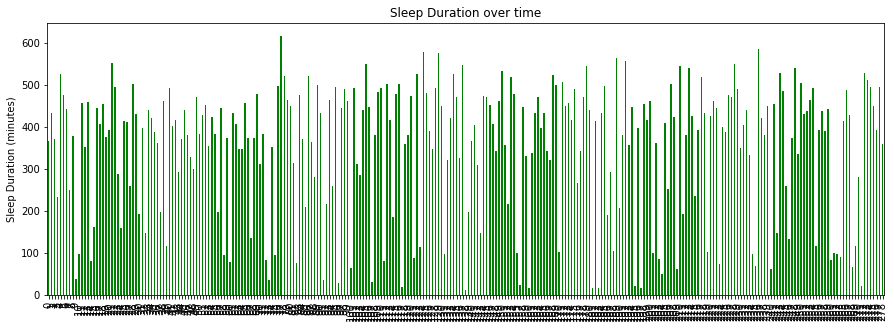

In [34]:
sleep_df['duration'].plot.bar(color='g',figsize=(15,5))
plt.ylabel("Sleep Duration (minutes)")
plt.title("Sleep Duration over time");

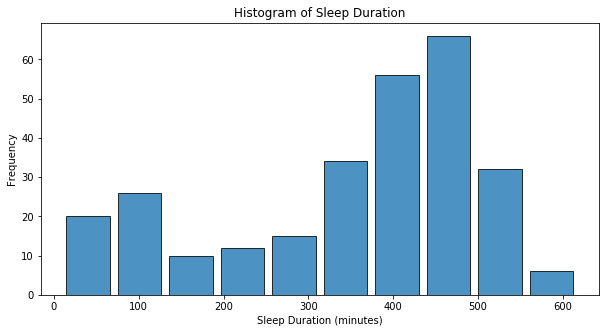

In [35]:
plt.subplots(figsize=(10,5))
plt.hist(sleep_df['duration'], alpha=0.8, rwidth=0.85, edgecolor='black')
plt.xlabel("Sleep Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Histogram of Sleep Duration");
plt.show()

#### We can see that the person mostly sleeps between 400 and 500 mins most of the days which seems to be a goof sleep duration. From the barplot we see there are several short duration sleeps. Are those afternoon naps? We'll explore this at a later stage

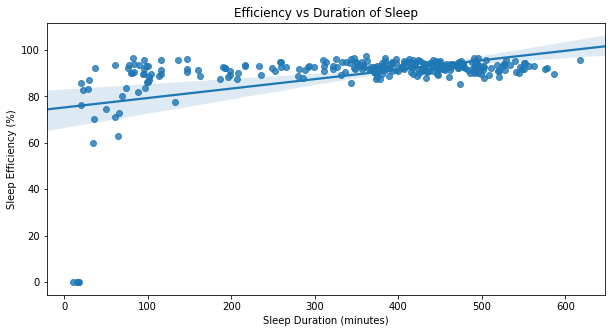

In [36]:
plt.subplots(figsize=(10,5))
sns.regplot(sleep_df['duration'], sleep_df['efficiency'])
plt.xlabel("Sleep Duration (minutes)")
plt.ylabel("Sleep Efficiency (%)")
plt.title("Efficiency vs Duration of Sleep");

#### The efficiency of the sleep in general is high (>80% for most of the days), and the quality is greater in general for longer sleep duration. However the linear regression does't seem to a good fit!

#### Let's look at the distribution of the numerical fields

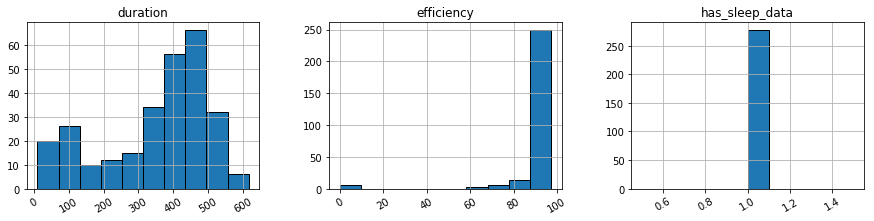

In [37]:
h1 = sleep_df.hist(figsize = (15,15), layout = (4,3), xrot = 30, edgecolor='black')

#### Observations

- Duration is mostly between 400 - 500 mins every day
- Efficiency is generally high

#### Let's do some data manipulations

In [38]:
from datetime import datetime

# Create a weekday label which says which day of the week we are looking at
date = sleep_df['start_time'].dt.date
sleep_df['weekday'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
sleep_df['day'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).day , na_action = 'ignore')
sleep_df['month'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month , na_action = 'ignore')
sleep_start = sleep_df['start_time'].dt.time

#Sleep start time
sleep_df['sleep_start_hr'] = sleep_start.map(lambda x: (datetime.strptime(str(x),"%H:%M:%S")).hour\
                                             +(datetime.strptime(str(x),"%H:%M:%S")).minute/60.0, na_action = 'ignore')
#Waking up time
sleep_df['wake_hour'] = (sleep_df['sleep_start_hr']+sleep_df['duration']/60)%24
sleep_df.head()

sleep_df.head()

,efficiency,has_sleep_data,datauuid,end_time,start_time,time_offset,update_time,create_time,duration,weekday,day,month,sleep_start_hr,wake_hour
0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,2018-03-08 09:30:00,2018-03-08 03:23:00,UTC-0400,2018-03-08 13:39:58.387,2018-03-08 09:32:02.181,367.0,3,8,3,3.383333,9.500000
1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,2018-02-25 13:28:00,2018-02-25 06:15:00,UTC-0400,2018-02-25 13:30:16.332,2018-02-25 13:30:16.332,433.0,6,25,2,6.250000,13.466667
2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,2018-06-02 09:49:00,2018-06-02 03:37:00,UTC-0300,2018-06-02 09:49:32.094,2018-06-02 09:49:32.094,372.0,5,2,6,3.616667,9.816667
3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,2018-06-23 10:32:00,2018-06-23 06:39:00,UTC-0300,2018-06-23 10:47:26.337,2018-06-23 10:47:26.337,233.0,5,23,6,6.650000,10.533333
4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,2018-01-05 13:41:00,2018-01-05 04:54:00,UTC-0400,2018-01-05 13:44:59.850,2018-01-05 13:44:59.850,527.0,4,5,1,4.900000,13.683333


In [39]:
colrcode = [(31, 119, 180), (255, 127, 14), (44, 160, 44), (214, 39, 40)]

for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)
    
from scipy import stats
def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.6, .9), xycoords=ax.transAxes)

#### Looking at wake up time and sleep times

Text(0,0.5,'Number of days')

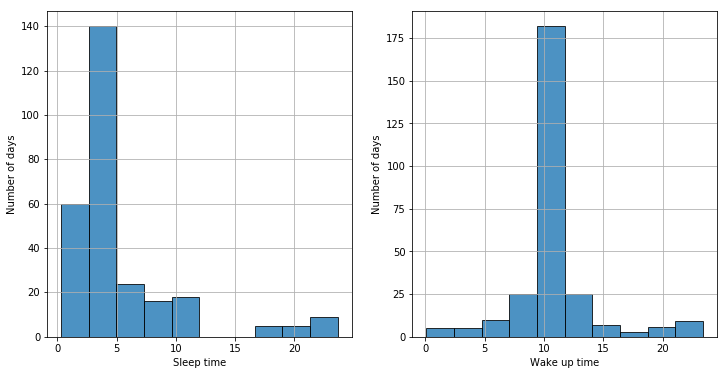

In [40]:
fig,axes = plt.subplots(figsize = (12,6),nrows = 1, ncols = 2)
plt.sca(axes[0])
h5 = sleep_df['sleep_start_hr'].hist(color = colrcode[0], alpha = 0.8, edgecolor='black')
plt.xlabel('Sleep time')
plt.ylabel('Number of days')

plt.sca(axes[1])
h6 = sleep_df['wake_hour'].hist(color = colrcode[0], alpha = 0.8, edgecolor='black')
plt.xlabel('Wake up time')
plt.ylabel('Number of days')

#### Observations

- The person goes to sleep mostly late after 12 am
- Consequently, he seems to wake up late

#### Looking at variation based on day of the week

In [41]:
sleep_minutes_asleep_mean = sleep_df['duration'].groupby(sleep_df['weekday']).mean()
sleep_efficiency = sleep_df['efficiency'].groupby(sleep_df['weekday']).mean()

([<matplotlib.axis.XTick at 0x1f78a0d7be0>,
 <a list of 7 Text xticklabel objects>)

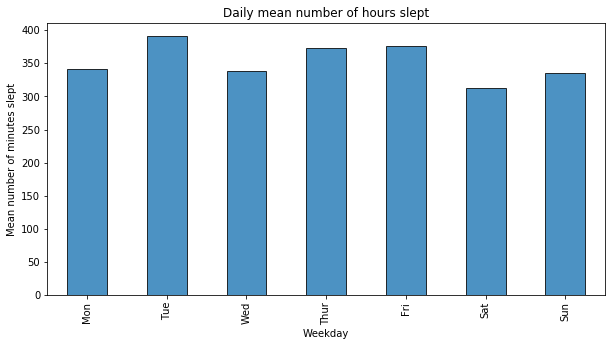

In [42]:
plt.subplots(figsize=(10,5))
sleep_minutes_asleep_mean.plot(kind = 'bar',color = colrcode[0], alpha = 0.8, edgecolor='black')
plt.xlabel("Weekday")
plt.ylabel('Mean number of minutes slept')
plt.title('Daily mean number of hours slept')
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

([<matplotlib.axis.XTick at 0x1f78a0990b8>,
 <a list of 7 Text xticklabel objects>)

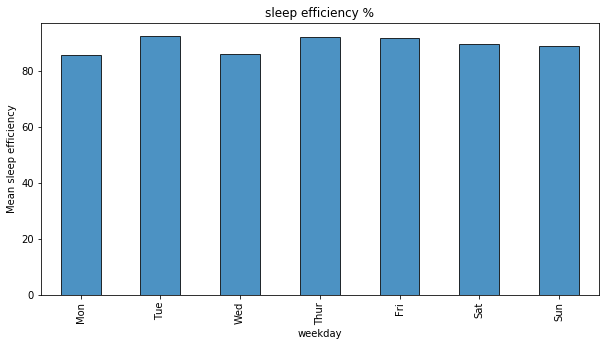

In [43]:
plt.subplots(figsize=(10,5))
sleep_efficiency.plot(kind = 'bar',color = colrcode[0], alpha = 0.8, edgecolor='black')
plt.ylabel('Mean sleep efficiency')
plt.title('sleep efficiency %')
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

Text(0,0.5,'Wake up time')

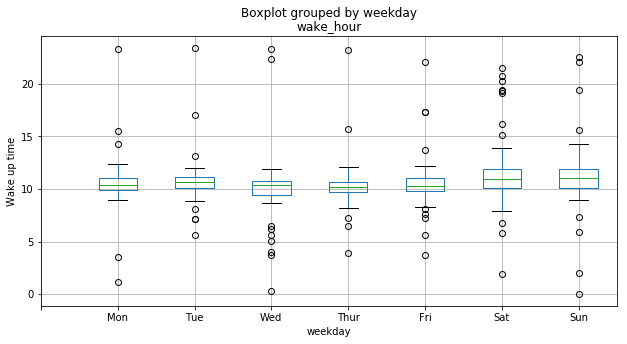

In [44]:
sleep_df.boxplot(column= 'wake_hour', by = 'weekday',figsize=(10,5))
plt.xticks(list(range(8)),['','Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.ylabel('Wake up time')

Text(0.5,1,'Sleep start hour')

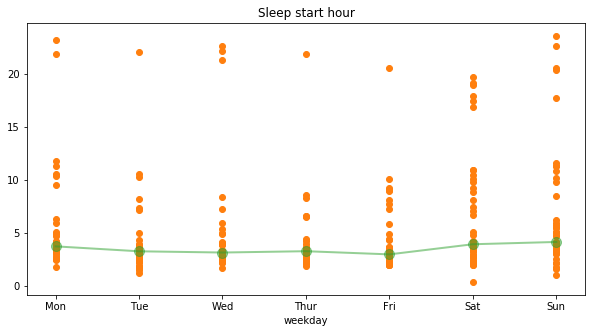

In [45]:
plt.subplots(figsize=(10,5))
sl_hr = sleep_df['sleep_start_hr'].groupby(sleep_df['weekday']).median()
sl_hr.plot(kind = 'line',color = colrcode[2],alpha = 0.5,linewidth = 2, marker = 'o',markersize = 10)
plt.xticks(list(range(8)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.scatter(sleep_df['weekday'],sleep_df['sleep_start_hr'], color = colrcode[1])
plt.title('Sleep start hour')

#### Observations based on the above plots

- On average, the person woke up between 10 and 11 am
- The person sleeps late everyday
- Sleep efficency is good over all (>80% on all days)
- Statistically, the person sleeps the longest on Tuesdays and Fridays, and the sleep efficiency on those days are also marginally higher as compared to other days
- Wake up time is the latest on Saturday and Sunday

#### Let's now look at the variations across months

Text(0.5,1,'Wake up hours over months')

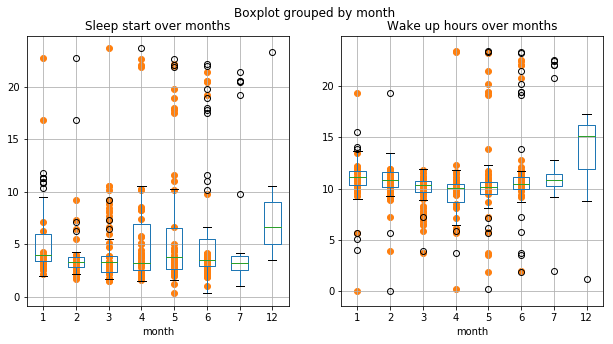

In [46]:
sleep_start_by_month = sleep_df['sleep_start_hr'].groupby(sleep_df['month']).median()
fig,axes = plt.subplots(figsize=(10,5), nrows = 1, ncols = 2)
plt.sca(axes[0])
plt.scatter(sleep_df['month']-1,sleep_df['sleep_start_hr'], color = colrcode[1])
sleep_df.boxplot(column='sleep_start_hr', by='month', ax =axes[0])
plt.title('Sleep start over months')

plt.sca(axes[1])
sleep_df.boxplot(column='wake_hour', by='month', ax =axes[1])
plt.scatter(sleep_df['month']-1,sleep_df['wake_hour'], color = colrcode[1])
plt.title('Wake up hours over months')

#### Observations based on the above plots

- The time the person went to bed was less variable in March and April compared to other months
- The person wakes up early in April compared to all other months

#### Now let us group the data based on the days. The grouped dataframe is used later in the analysis!

In [47]:
sleep_df['day'] = sleep_df['create_time'].dt.date
sleep_df_grp = sleep_df.groupby(['day'])[['duration','efficiency']].agg(['count', 'mean', 'median', 'max', 'min']).reset_index()
sleep_df_grp.columns = ["_".join(x) for x in sleep_df_grp.columns.ravel()]
sleep_df_grp.rename(columns={'day_':'day'}, inplace=True)
sleep_df_grp.head()

,day,duration_count,duration_mean,duration_median,duration_max,duration_min,efficiency_count,efficiency_mean,efficiency_median,efficiency_max,efficiency_min
0,2017-12-16,1,411.0,411.0,411.0,411.0,1,94.902916,94.902916,94.902916,94.902916
1,2017-12-18,1,491.0,491.0,491.0,491.0,1,96.341460,96.341460,96.341460,96.341460
2,2017-12-20,1,293.0,293.0,293.0,293.0,1,93.174065,93.174065,93.174065,93.174065
3,2017-12-22,1,501.0,501.0,501.0,501.0,1,91.434265,91.434265,91.434265,91.434265
4,2017-12-23,1,322.0,322.0,322.0,322.0,1,93.188850,93.188850,93.188850,93.188850


### 3.2. Exercise Data

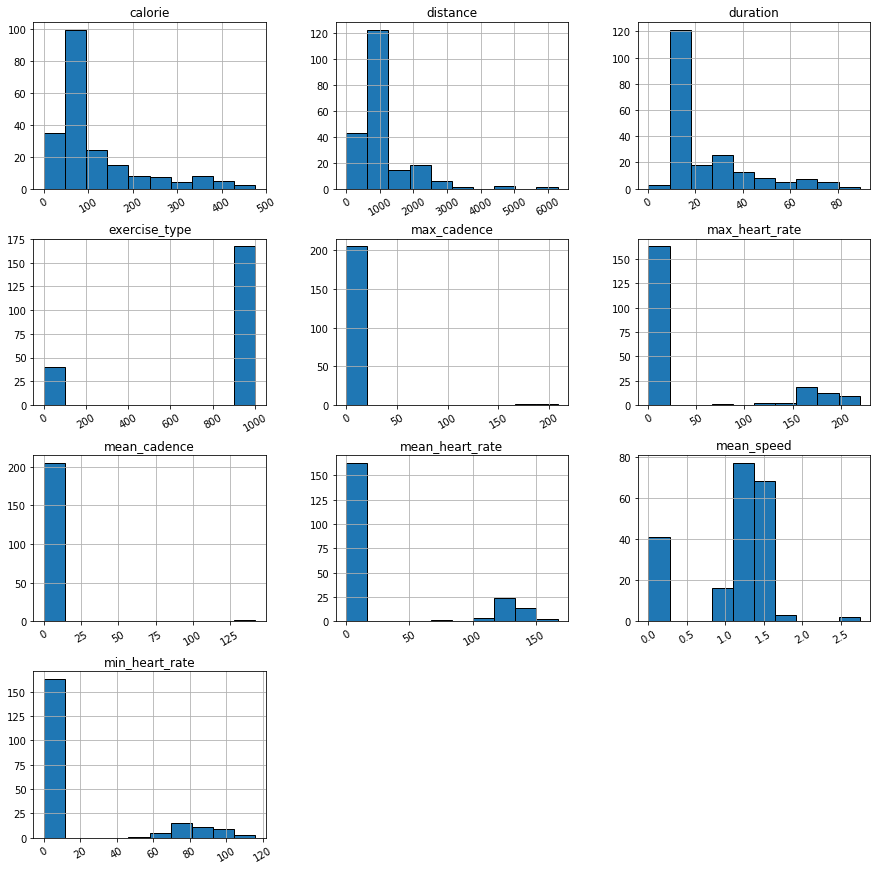

In [48]:
h2 = exercise_df.hist(figsize = (15,15), layout = (4,3), xrot = 30, edgecolor='black')

#### Observations

- The person burns mostly between 50-200 Kcal during workout
- The max_cadence, mean_cadence is mostly zero
- The workout session is genreally between 10-30 minutes

#### Let's do some data manipulations

In [49]:
date = exercise_df['start_time'].dt.date
exercise_df['weekday'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
exercise_df['day'] = exercise_df['create_time'].dt.date
exercise_df['month'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month , na_action = 'ignore')
exercise_df.head()

,end_time,start_time,duration,deviceuuid,max_heart_rate,mean_heart_rate,max_cadence,time_offset,exercise_type,calorie,...,mean_speed,update_time,min_heart_rate,live_data,distance,datauuid,create_time,weekday,day,month
0,2018-04-07 17:40:40.673,2018-04-07 17:26:10.149,14.508733,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,58.420,...,1.257754,2018-04-07 17:41:42.416,0.0,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416,5,2018-04-07,4
2,2018-05-01 18:12:20.915,2018-05-01 18:01:24.059,10.947600,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,43.850,...,1.323111,2018-05-01 18:13:21.374,0.0,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374,1,2018-05-01,5
4,2018-03-16 17:25:39.584,2018-03-16 17:15:20.192,10.323200,F/D7+hL5E5,0.0,0.0,0.0,UTC-0300,1001,42.630,...,1.413036,2018-03-16 17:26:39.581,0.0,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581,4,2018-03-16,3
7,2017-12-29 16:41:21.980,2017-12-29 15:32:24.297,68.925250,F/D7+hL5E5,220.0,140.0,0.0,UTC-0700,0,366.661,...,0.000000,2017-12-30 12:01:22.159,79.0,05012792-1bd2-9582-a99d-2bbfa48d99da.live_data...,0.000,05012792-1bd2-9582-a99d-2bbfa48d99da,2017-12-29 16:41:22.192,4,2017-12-29,12
8,2018-02-28 08:04:01.482,2018-02-28 07:53:46.739,10.245717,F/D7+hL5E5,0.0,0.0,0.0,UTC-0400,1001,49.230,...,1.585639,2018-02-28 08:05:02.244,0.0,05daffcd-f6da-ea4c-ab78-80a7e748c324.live_data...,801.969,05daffcd-f6da-ea4c-ab78-80a7e748c324,2018-02-28 08:05:02.244,2,2018-02-28,2


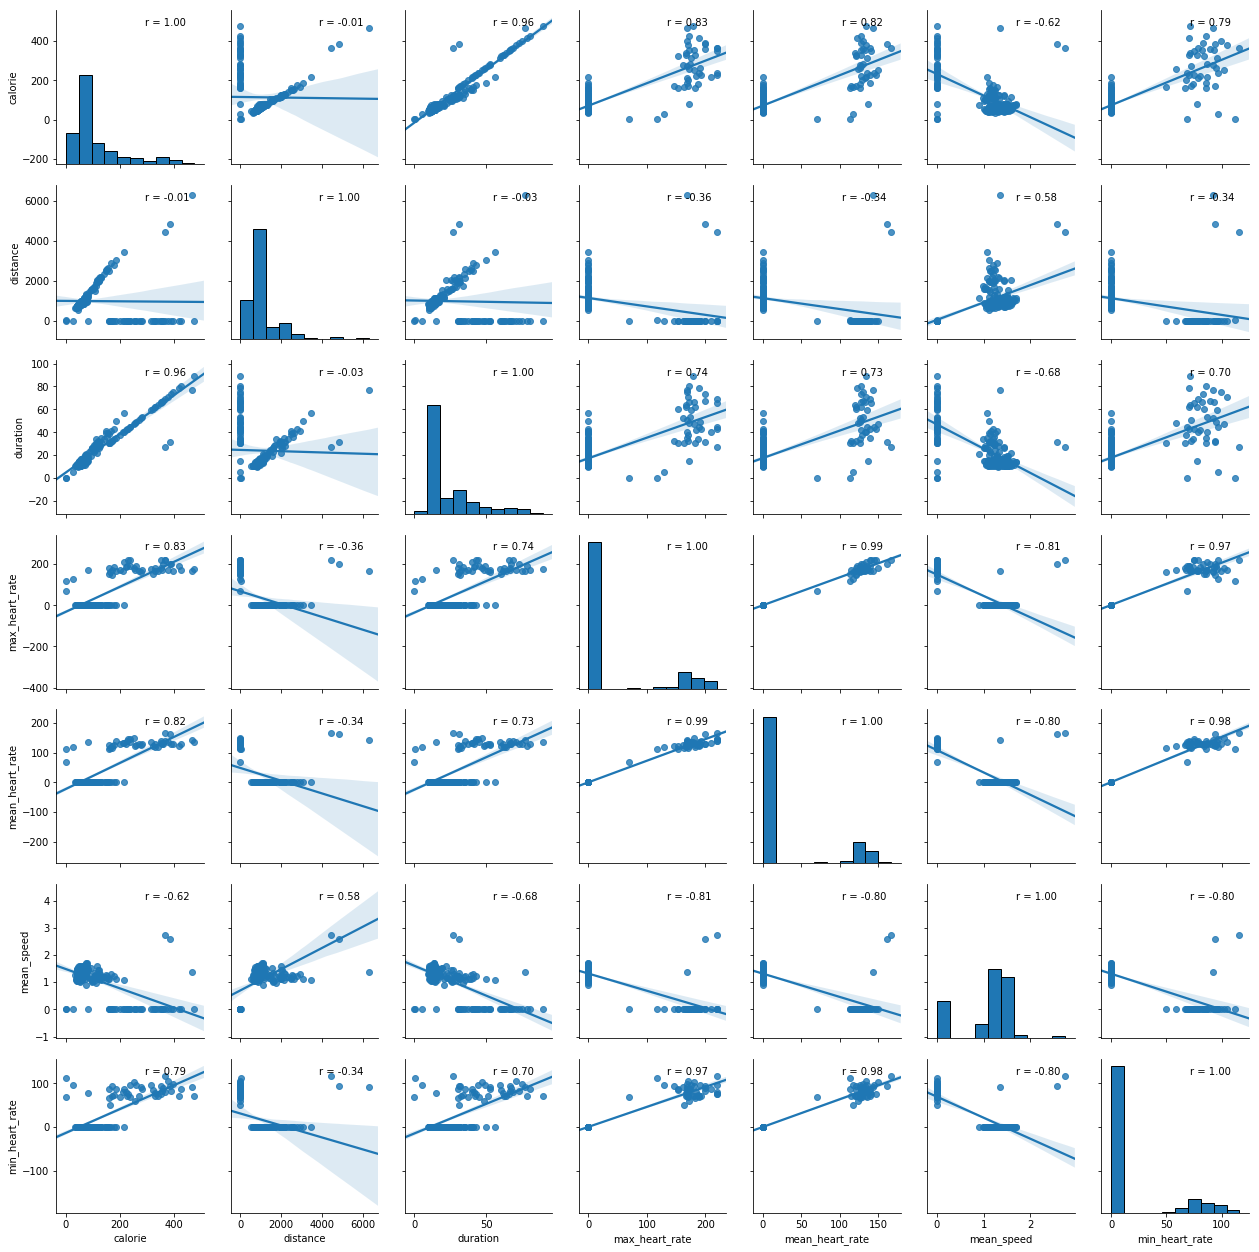

In [50]:
exercise_df_subset = exercise_df[['calorie','distance','duration', 'max_heart_rate', 'mean_heart_rate',\
                                  'mean_speed', 'min_heart_rate']]
g3 = sns.PairGrid(exercise_df_subset)
g3.map_diag(plt.hist, edgecolor = 'black')
g3.map_offdiag(sns.regplot)
g3.map(corrfunc)
plt.show()

#### Observations
- calorie/ duration, heart rate/ calorie have positive correlation

#### Currently the plots appear clutterd. Let's cut down on the variables!
#### Gropuing the data based on day

In [51]:
exercise_df_grp = exercise_df.groupby(['day'])[['calorie', 'distance', 'duration']].agg(['sum']).reset_index()
exercise_df_grp.columns = ["_".join(x) for x in exercise_df_grp.columns.ravel()]
exercise_df_grp.rename(columns={'day_':'day'}, inplace=True)
exercise_df_grp.head()

,day,calorie_sum,distance_sum,duration_sum
0,2017-12-18,113.670,1684.150,25.682383
1,2017-12-19,160.901,0.000,30.272167
2,2017-12-20,140.400,2205.440,38.262733
3,2017-12-21,27.645,0.000,5.200200
4,2017-12-24,553.224,4420.025,61.963850


#### The above data frame is later used in conjunction with sleep data for further analysis

### 3.3 Floor Data

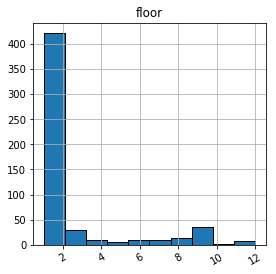

In [52]:
h3 = floor_df.hist(figsize = (15,20), layout = (4,3), xrot = 30, edgecolor='black')

#### The person seems to climb 1 floor at the different observation points. These climbs are distributed on several ocassions within the same day. We will look at the distributions again after groupiing the data by day.

#### Let's do some data manipulations

In [53]:
date = floor_df['start_time'].dt.date
floor_df['weekday'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
floor_df['day'] = floor_df['create_time'].dt.date
floor_df['month'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month , na_action = 'ignore')
floor_df.head()

,end_time,time_offset,start_time,floor,datauuid,update_time,create_time,weekday,day,month
0,2018-01-24 21:30:56,UTC-0400,2018-01-24 21:29:51,2.0,00443274-6e30-97f9-3eb2-75d17f3e766f,2018-01-24 21:34:47.756,2018-01-24 21:34:47.720,2,2018-01-24,1
1,2018-03-27 21:04:27,UTC-0300,2018-03-27 21:04:01,1.0,00ed787d-a38b-8fcf-886d-b15a30e02ff6,2018-03-27 21:11:51.606,2018-03-27 21:11:51.606,1,2018-03-27,3
2,2018-02-12 07:40:16,UTC-0400,2018-02-12 07:38:21,2.0,012ee314-b5de-8ac7-0421-c634e858ebc4,2018-02-12 07:41:27.854,2018-02-12 07:41:27.802,0,2018-02-12,2
3,2018-03-16 17:17:22,UTC-0300,2018-03-16 17:17:05,1.0,016876d6-2d1f-5514-a6c2-12b580e0654c,2018-03-16 17:22:41.066,2018-03-16 17:22:41.044,4,2018-03-16,3
4,2018-01-22 15:50:38,UTC-0400,2018-01-22 15:50:22,1.0,01c24d32-905b-9f65-732e-3c13faf2a1c4,2018-01-22 15:52:59.388,2018-01-22 15:52:59.367,0,2018-01-22,1


#### Grouping the data based on day

In [54]:
floor_df_grp = floor_df.groupby(['day'])[['floor']].agg(['sum']).reset_index()
floor_df_grp.columns = ["_".join(x) for x in floor_df_grp.columns.ravel()]
floor_df_grp.rename(columns={'day_':'day'}, inplace=True)
floor_df_grp.head()

,day,floor_sum
0,2017-12-16,10.0
1,2017-12-17,9.0
2,2017-12-18,13.0
3,2017-12-19,10.0
4,2017-12-20,7.0


In [55]:
ftg = floor_df_grp
ftg.set_index('day', inplace=True)

,count,mean,std,min,25%,50%,75%,max
floor_sum,116.0,11.284483,10.130287,1.0,5.0,10.0,15.0,79.0


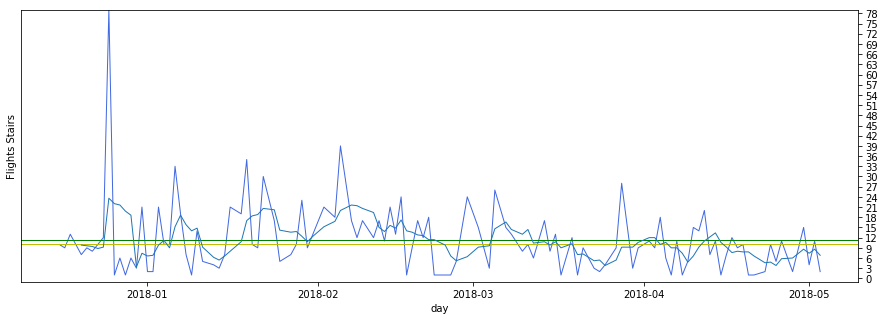

In [56]:
medianval2 = np.round(ftg['floor_sum'].median(),1)
avgval2 = np.round(ftg['floor_sum'].mean(),1)
maxval2 = np.round(ftg['floor_sum'].max(),1)

minor_ticks_stairs = np.arange(0, maxval2+2, 3, dtype=int)
minor_labels_stairs = minor_ticks_stairs

ax2 = ftg['floor_sum'].plot(color='royalblue',figsize=(15, 5),linewidth=1.0)

ax2.set_ylim(-1,maxval2)
ax2.set_ylabel('Flights Stairs')
ax2.set_yticks(minor_ticks_stairs)
ax2.set_yticklabels(minor_labels_stairs)
ax2.yaxis.tick_right()

#Add the horizontal and vertical lines for mean and median
ax2.axhline(y=medianval2, linewidth=1, color='y')
ax2.axhline(y=avgval2, linewidth=1, color='g')
ax2.grid(b=False)

#Rolling 5 Day MA
ma2 = ftg['floor_sum'].rolling(5).mean()
ax2.plot(ma2,linewidth=1.0)

pd.DataFrame(ftg['floor_sum'].describe()).transpose()

#### Most active day ever by number of climbed stairs

In [57]:
floor_df_grp[floor_df_grp['floor_sum']==floor_df_grp['floor_sum'].max()]

,floor_sum
day,
2017-12-25,79.0


### 3.4. Heart Rate Data

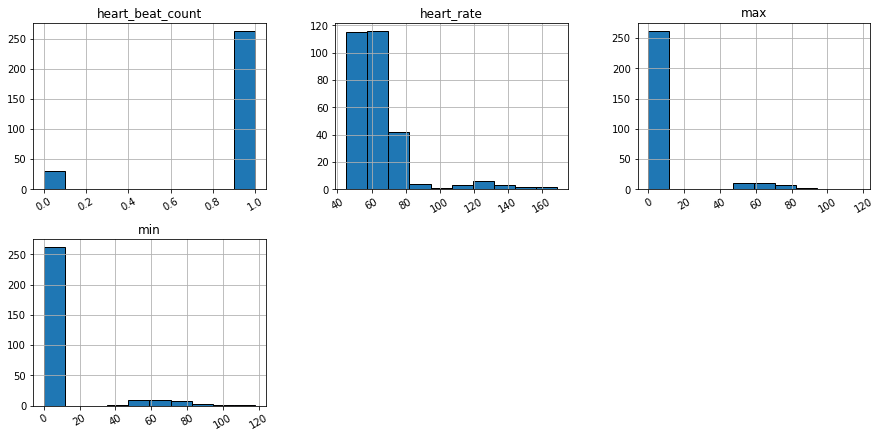

In [58]:
h4 = heart_rate_df.hist(figsize = (15,15), layout = (4,3), xrot = 30, edgecolor='black')

#### Observations
- The heart rate is between 50-80 on most of the days which seems to be in the healthy regime
- We will look at the heart rate information in while working out in the exercise dataset

#### Let's do some data manipulations

In [59]:
date = heart_rate_df['start_time'].dt.date
heart_rate_df['weekday'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
heart_rate_df['day'] = heart_rate_df['create_time'].dt.date
heart_rate_df['month'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month , na_action = 'ignore')
heart_rate_df['hour'] = heart_rate_df['create_time'].dt.hour
heart_rate_df.head()

,end_time,heart_rate,start_time,heart_beat_count,update_time,max,min,time_offset,datauuid,create_time,weekday,day,month,hour
0,2017-12-16 04:30:29.450,60.0,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,UTC-0400,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341,5,2017-12-16,12,4
1,2017-12-16 05:50:29.380,56.0,2017-12-16 05:50:29.380,1,2017-12-16 05:55:00.264,0.0,0.0,UTC-0400,038d68e5-ddb9-df1f-f52f-4f85c32cb95a,2017-12-16 05:55:00.264,5,2017-12-16,12,5
2,2017-12-30 02:08:16.211,55.0,2017-12-30 02:08:16.211,1,2017-12-30 02:08:16.411,0.0,0.0,UTC-0700,0423adf2-6d1f-6e23-276b-ec25462bf3d5,2017-12-30 02:08:16.411,5,2017-12-30,12,2
3,2018-01-15 14:47:37.175,62.0,2018-01-15 14:47:37.175,1,2018-01-15 14:47:37.371,0.0,0.0,UTC-0400,07dc6531-0aa6-1b07-df29-049197357434,2018-01-15 14:47:37.371,0,2018-01-15,1,14
4,2017-12-16 02:20:29.470,47.0,2017-12-16 02:20:29.470,1,2017-12-16 02:35:00.252,0.0,0.0,UTC-0400,0a32cb55-8257-d3ae-e87a-e38ecb14fe97,2017-12-16 02:35:00.252,5,2017-12-16,12,2


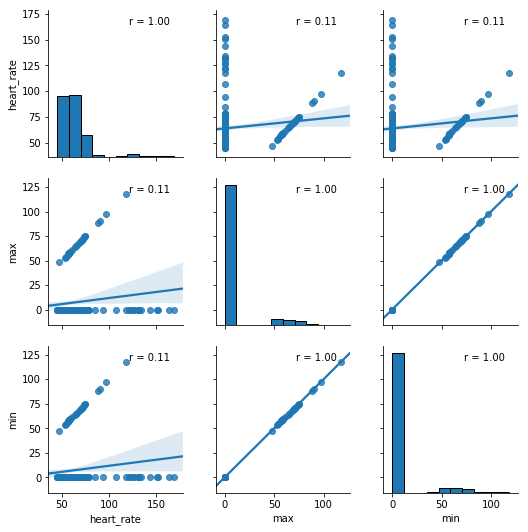

In [60]:
heart_rate_df_subset = heart_rate_df[['heart_rate', 'max', 'min']]
g2 = sns.PairGrid(heart_rate_df_subset)
g2.map_diag(plt.hist, edgecolor = 'black')
g2.map_offdiag(sns.regplot)
g2.map(corrfunc)
plt.show()

#### Observations

- The maximum and mminimum heart rate seem to be strongly correlated

#### Grouping the data based on day

In [61]:
heart_rate_df_grp = heart_rate_df.groupby(['day'])[['heart_rate']].agg(['mean', 'median', 'max', 'min']).reset_index()
heart_rate_df_grp.columns = ["_".join(x) for x in heart_rate_df_grp.columns.ravel()]
heart_rate_df_grp.rename(columns={'day_':'day'}, inplace=True)
heart_rate_df_grp.head()

,day,heart_rate_mean,heart_rate_median,heart_rate_max,heart_rate_min
0,2017-05-13,56.0,56.0,58.0,54.0
1,2017-09-16,56.0,56.0,56.0,56.0
2,2017-11-06,93.5,93.5,97.0,90.0
3,2017-11-19,55.5,55.5,57.0,54.0
4,2017-11-24,58.0,58.0,58.0,58.0


#### Box Plot for Heart Rate Data 

[]

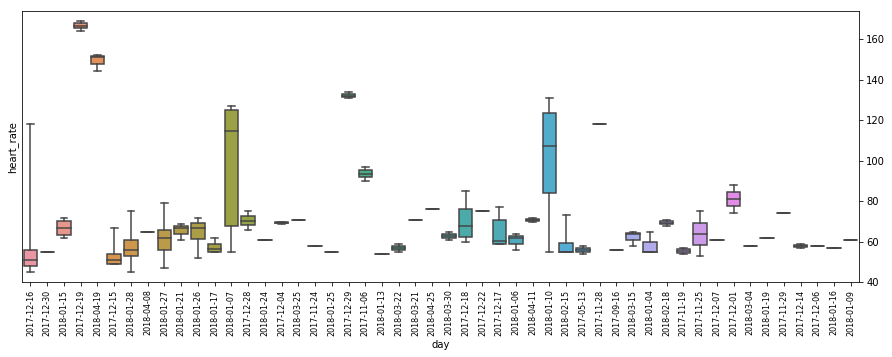

In [62]:
plt.figure(figsize=(15,5))
ax5 = sns.boxplot(x="day", y="heart_rate", data=heart_rate_df, whis=[0,100])
ax5.set_ylim(heart_rate_df['heart_rate'].min()-5,heart_rate_df['heart_rate'].max()+5)
ax5.set_xticklabels(heart_rate_df['day'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=8)
ax5.plot()

#### Observations
- Heart rates seem to be high on some days in December
- Wide range in heart rates on 7th and 10th January 2018

#### Average Heart Rate by Hour Chart

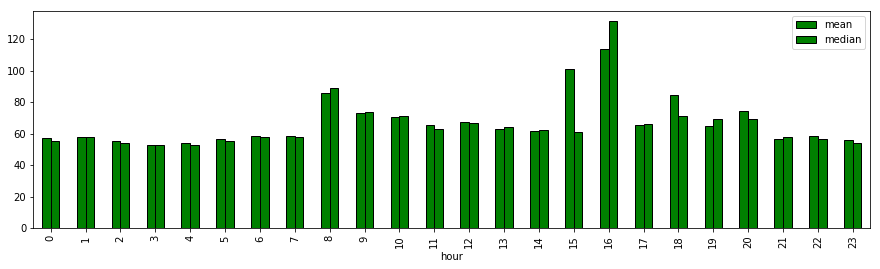

In [63]:
a1 = heart_rate_df.groupby("hour").agg({np.mean,np.median})
mean = heart_rate_df.groupby("hour").agg(np.mean)
a1['heart_rate'].plot.bar(color='g',figsize=(15,4), edgecolor='black')

#### Observations
- The mean and meadian values over night time is lower as compared to daytime
- The values are highest closer to 4 pm

#### We'll have a closer look at the heart data after combining the data frames later!

### 3.5. Step Data

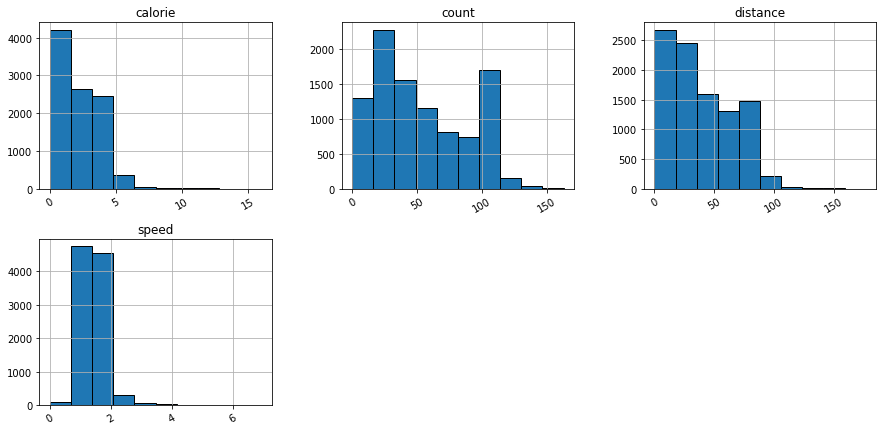

In [64]:
h4 = step_df.hist(figsize = (15,15), layout = (4,3), xrot = 30, edgecolor='black')

#### Observations

- The person burns between 0-5 Kcalories by walk in a singe instance
- The total count of steps is less than 150 in a single instance of observation/ record

#### These observations are distributed on several ocassions within the same day. We will look at the distributions again after groupiing the data by day

#### Let's do some data manipulations

In [65]:
date = step_df['start_time'].dt.date
step_df['weekday'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
step_df['day'] = step_df['create_time'].dt.date
step_df['month'] = date.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month , na_action = 'ignore')
step_df['hour'] = step_df['create_time'].dt.hour
step_df.head()

,end_time,start_time,count,calorie,update_time,speed,time_offset,distance,datauuid,create_time,weekday,day,month,hour
0,2018-04-30 18:21:59.999,2018-04-30 18:21:00,101,4.29,2018-04-30 18:35:00.291,1.527778,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290,0,2018-04-30,4,18
1,2018-04-13 19:47:59.999,2018-04-13 19:47:00,25,0.96,2018-04-13 19:55:00.251,1.027778,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251,4,2018-04-13,4,19
2,2018-04-02 10:01:59.999,2018-04-02 10:01:00,38,1.53,2018-04-02 10:14:58.210,1.194444,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209,0,2018-04-02,4,10
3,2018-04-27 10:52:59.999,2018-04-27 10:52:00,35,1.45,2018-04-27 10:55:01.281,1.500000,UTC-0300,27.45,0006c29c-72a3-b207-069e-b098a9f96252,2018-04-27 10:55:01.280,4,2018-04-27,4,10
4,2018-04-21 13:47:00.000,2018-04-21 13:46:00,0,0.00,2018-04-21 13:46:36.801,0.000000,UTC-0300,0.00,001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c,2018-04-21 13:46:36.801,5,2018-04-21,4,13


#### Grouping the data based on day

In [66]:
step_df_grp = step_df.groupby(['day'])[['count', 'calorie', 'distance']].agg(['sum']).reset_index()
step_df_grp.columns = ["_".join(x) for x in step_df_grp.columns.ravel()]
step_df_grp['speed_mean'] = step_df.groupby(['day'])[['speed']].agg(['mean']).reset_index()['speed']
step_df_grp.rename(columns={'day_':'day'}, inplace=True)
step_df_grp.head()

,day,count_sum,calorie_sum,distance_sum,speed_mean
0,2018-03-31,11039,476.101001,8079.278006,1.461493
1,2018-04-01,18468,766.199985,13471.121907,1.366012
2,2018-04-02,17441,748.368988,12911.609933,1.460277
3,2018-04-03,9345,433.487997,6909.307995,1.492620
4,2018-04-04,20404,913.739992,15286.599958,1.486114


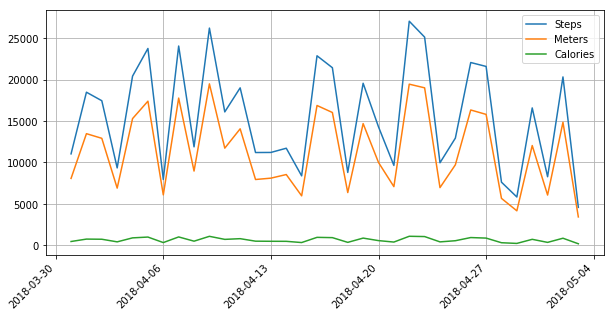

In [67]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.plot(step_df_grp['day'], step_df_grp['count_sum'], '-', label = 'Steps')
ax1.plot(step_df_grp['day'], step_df_grp['distance_sum'], '-', label = 'Meters')
ax1.plot(step_df_grp['day'], step_df_grp['calorie_sum'], '-', label = 'Calories')
ax1.legend()
ax1.grid()
fig.autofmt_xdate(rotation = 45)

#### Observations based on the above plots

- The step count was higher in April as compared to the March and May. The number of calories burnt is high as well for the month of April

#### Let's try to find out the correations

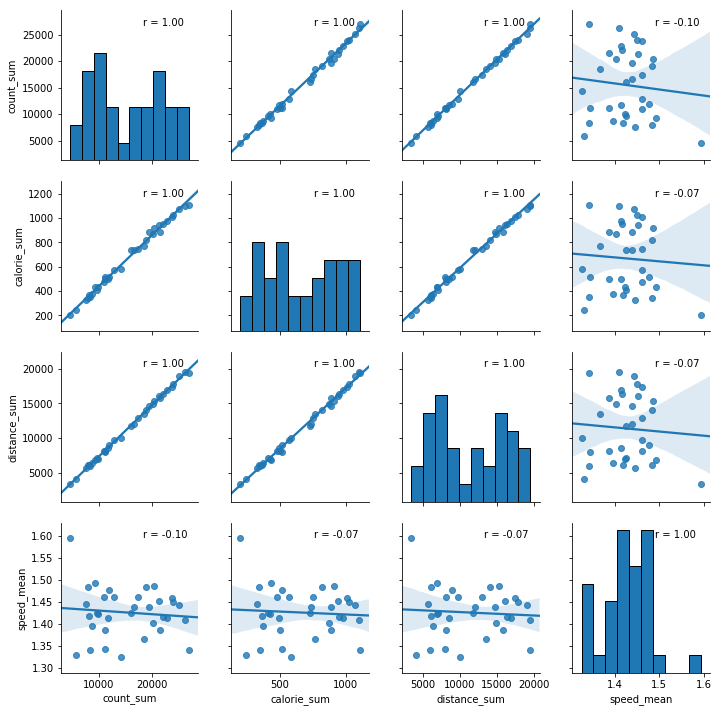

In [68]:
g1 = sns.PairGrid(step_df_grp)
g1.map_diag(plt.hist, edgecolor = 'black')
g1.map_offdiag(sns.regplot)
g1.map(corrfunc)
plt.show()

#### Observation from the corrrelation matrix

- distance/count, distace/calories and count/ calories are strongly correlated
- distance and speed are not correated

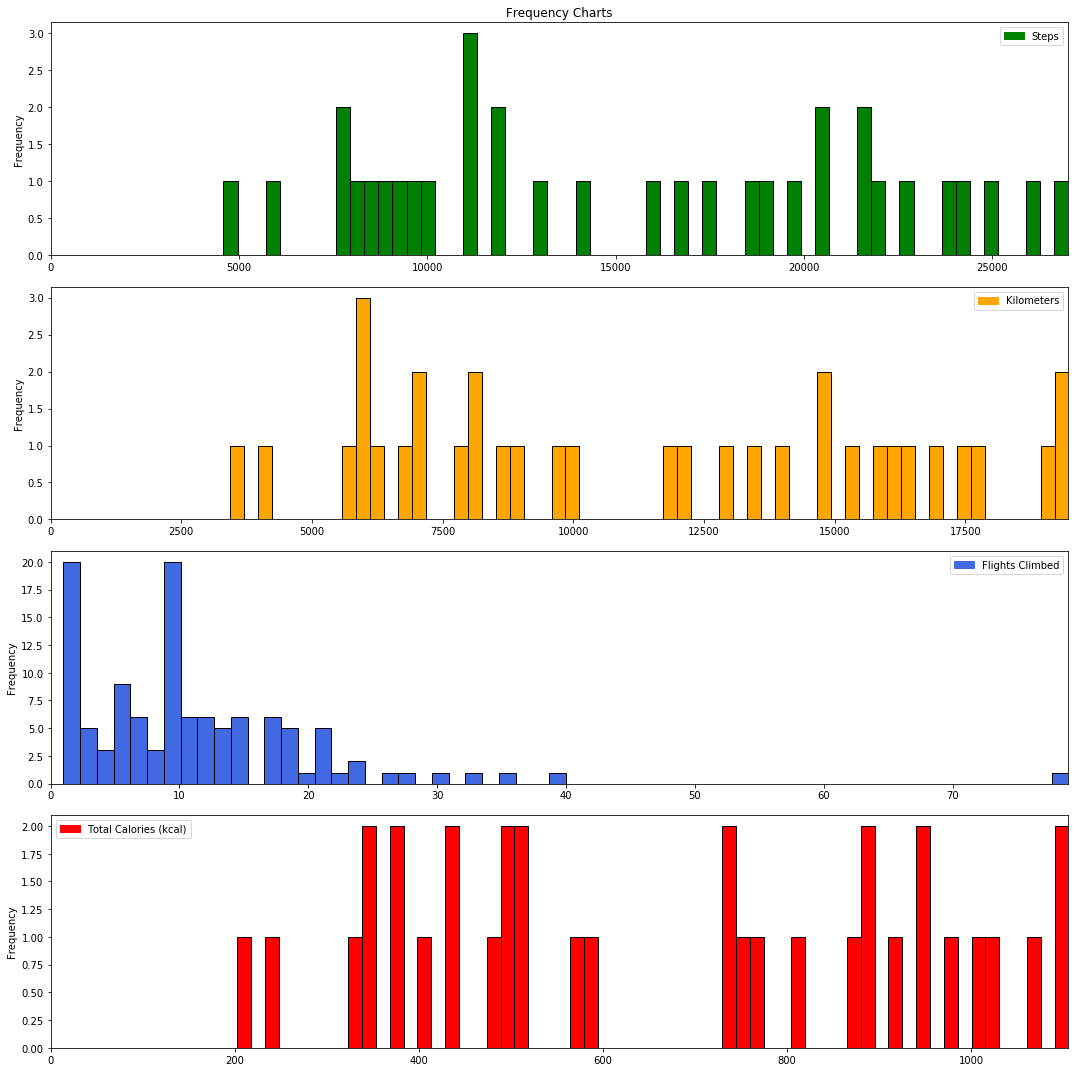

In [69]:
plt.figure(1,figsize=(15,15))

plt.subplot(411)
plt.title('Frequency Charts')
plt.legend(handles=[mpatches.Patch(color='green', label='Steps')])
plt.hist(step_df_grp['count_sum'], bins=60, color='g', edgecolor='black')
plt.ylabel('Frequency')
plt.xlim(0,step_df_grp['count_sum'].max())

plt.subplot(412)
plt.legend(handles=[mpatches.Patch(color='orange', label='Kilometers')])
plt.hist(step_df_grp['distance_sum'], bins=60, color='orange', edgecolor='black')
plt.ylabel('Frequency')
plt.xlim(0,step_df_grp['distance_sum'].max())

plt.subplot(413)
plt.legend(handles=[mpatches.Patch(color='royalblue', label='Flights Climbed')])
plt.hist(floor_df_grp['floor_sum'], bins=60, color='royalblue', edgecolor='black')
plt.ylabel('Frequency')
plt.xlim(0,floor_df_grp['floor_sum'].max())

plt.subplot(414)
plt.legend(handles=[mpatches.Patch(color='red', label='Total Calories (kcal)')])
plt.hist(step_df_grp['calorie_sum'], bins=60, color='red', edgecolor='black')
plt.ylabel('Frequency')
plt.xlim(0,step_df_grp['calorie_sum'].max())

plt.tight_layout()
plt.show()

In [70]:
stg = step_df_grp
stg.set_index('day', inplace=True)

,count,mean,std,min,25%,50%,75%,max
count_sum,34.0,15486.794118,6543.432654,4590.0,9727.75,15195.5,21166.0,27024.0


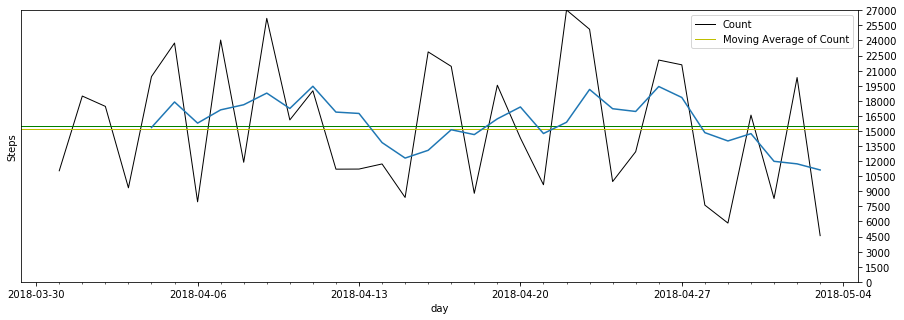

In [71]:
medianval = np.round(stg['count_sum'].median(),1)
avgval = np.round(stg['count_sum'].mean(),1)
maxval = np.round(stg['count_sum'].max(),1)

minor_ticks = np.arange(0, maxval+1, 1500, dtype=int)
minor_labels = minor_ticks

ax1 = stg['count_sum'].plot(color='000000',figsize=(15, 5),linewidth=1.0)

ax1.set_ylim(0,maxval)
ax1.set_ylabel('Steps')
ax1.set_yticks(minor_ticks)
ax1.set_yticklabels(minor_labels)
ax1.yaxis.tick_right()

ax1.set_xticks(stg.index, minor=True)
#Add the horizontal and vertical lines for mean and median
ax1.axhline(y=medianval, linewidth=1, color='y')
ax1.axhline(y=avgval, linewidth=1, color='g')
ax1.grid(b=False)

#Rolling 5 Day MA
ma = stg['count_sum'].rolling(5).mean()
ax1.plot(ma)
ax1.legend(['Count','Moving Average of Count'])

pd.DataFrame(stg['count_sum'].describe()).transpose()

In [72]:
stg2 = stg
stg2['distance_sum'] = stg2['distance_sum']/1000.0
stg2.head()

,count_sum,calorie_sum,distance_sum,speed_mean
day,,,,
2018-03-31,11039,476.101001,8.079278,1.461493
2018-04-01,18468,766.199985,13.471122,1.366012
2018-04-02,17441,748.368988,12.911610,1.460277
2018-04-03,9345,433.487997,6.909308,1.492620
2018-04-04,20404,913.739992,15.286600,1.486114


,count,mean,std,min,25%,50%,75%,max
distance_sum,34.0,11.389135,4.865202,3.43575,7.000127,10.864488,15.668067,19.47318


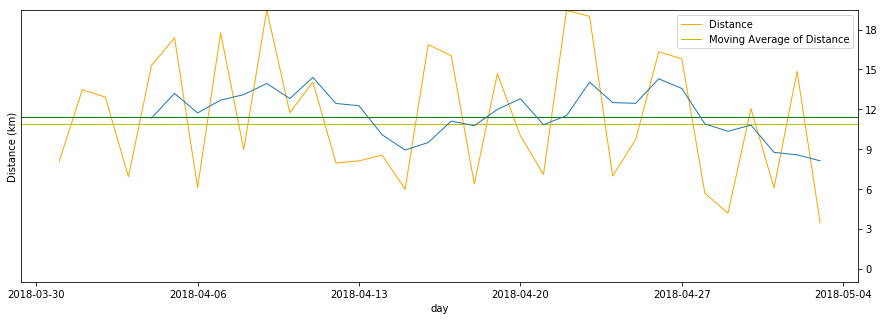

In [73]:
medianval3 = np.round(stg2['distance_sum'].median(),1)
avgval3 = np.round(stg2['distance_sum'].mean(),1)
maxval3 = np.round(stg2['distance_sum'].max(),1)

minor_ticks_km = np.arange(0, maxval3+1, 3, dtype=int)
minor_labels_km = minor_ticks_km

ax6 = stg2['distance_sum'].plot(color='orange',figsize=(15, 5),linewidth=1.0)

ax6.set_ylim(-1,stg2['distance_sum'].max())
ax6.set_ylabel('Distance (km)')
ax6.set_yticks(minor_ticks_km)
ax6.set_yticklabels(minor_labels_km)
ax6.yaxis.tick_right()

#Add the horizontal and vertical lines for mean and median
ax6.axhline(y=medianval3, linewidth=1, color='y')
ax6.axhline(y=avgval3, linewidth=1, color='g')
ax6.grid(b=False)

#Rolling 5 Day MA
ma2 = stg2['distance_sum'].rolling(5).mean()
ax6.plot(ma2,linewidth=1.0)
ax6.legend(['Distance','Moving Average of Distance'])

pd.DataFrame(stg2['distance_sum'].describe()).transpose()

#### Most active day ever by number of steps

In [74]:
step_df_grp[step_df_grp['count_sum']==step_df_grp['count_sum'].max()]

,count_sum,calorie_sum,distance_sum,speed_mean
day,,,,
2018-04-22,27024,1105.49896,19.438202,1.341119


#### Most active day ever by distance done

In [75]:
step_df_grp[step_df_grp['distance_sum']==step_df_grp['distance_sum'].max()]

,count_sum,calorie_sum,distance_sum,speed_mean
day,,,,
2018-04-09,26195,1099.679965,19.47318,1.408473


In [76]:
step_df_grp2 = step_df_grp.reset_index()
dd = step_df_grp2['day']
step_df_grp2['weekday'] = dd.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
step_df_grp2.head()

,day,count_sum,calorie_sum,distance_sum,speed_mean,weekday
0,2018-03-31,11039,476.101001,8.079278,1.461493,5
1,2018-04-01,18468,766.199985,13.471122,1.366012,6
2,2018-04-02,17441,748.368988,12.911610,1.460277,0
3,2018-04-03,9345,433.487997,6.909308,1.492620,1
4,2018-04-04,20404,913.739992,15.286600,1.486114,2


#### Averages, Medians, High, Low by Weekday

In [77]:
step_df_grp2.groupby('weekday').agg(['mean','median','min','max','std']).transpose()

weekday                         0             1             2             3  \
count_sum    mean    21635.400000  13021.800000  16288.800000  16224.400000   
             median  22859.000000   9967.000000  18994.000000  19546.000000   
             min     16574.000000   8281.000000   8799.000000   4590.000000   
             max     26195.000000  21420.000000  20404.000000  23740.000000   
             std      4403.318669   5597.015160   5190.603115   8093.729814   
calorie_sum  mean      926.777980    581.637589    708.716188    713.467792   
             median    975.759993    433.487997    816.900972    886.260991   
             min       738.579990    370.240986    372.429996    202.918997   
             max      1099.679965    941.978995    913.739992   1011.309987   
             std       173.556423    246.081333    230.387319    344.666746   
distance_sum mean       16.058032      9.541434     12.055681     11.955986   
             median     16.867836      6.970968     14.053909     14.683233   
             min        12.041239      6.075347      6.374462      3.435750   
             max        19.473180     16.023584     15.286600     17.386851   
             std         3.427353      4.252891      3.871160      6.014312   
speed_mean   mean        1.432722      1.442133      1.445631      1.450554   
             median      1.438716      1.425871      1.460362      1.438185   
             min         1.408473      1.418220      1.394865      1.343289   
             max         1.460277      1.492620      1.486114      1.594351   
             std         0.021799      0.031239      0.044147      0.091590   

weekday                         4             5             6  
count_sum    mean    13757.750000  12812.600000  14321.000000  
             median  12752.000000  11039.000000  11885.000000  
             min      7953.000000   7624.000000   5840.000000  
             max     21574.000000  24035.000000  27024.000000  
             std      5818.752752   6465.766026   8538.526864  
calorie_sum  mean      579.522745    547.116396    596.425587  
             median    542.534996    476.101001    515.639997  
             min       346.519996    327.510997    244.968996  
             max       886.500992   1026.189991   1105.498960  
             std       226.934802    275.862240    345.991838  
distance_sum mean       10.000368      9.429141     10.405547  
             median      9.055850      8.079278      8.965932  
             min         6.094551      5.672638      4.173681  
             max        15.795222     17.760091     19.438202  
             std         4.179578      4.785414      6.154091  
speed_mean   mean        1.394906      1.439195      1.371198  
             median      1.385808      1.445972      1.342021  
             min         1.324433      1.413936      1.329022  
             max         1.483573      1.461493      1.477818  
             std         0.065813      0.019483      0.061093

#### Observation
- Monday is the most active day followed by Thursday
- Saturday is the least active day

### Let us now join some of the datasets and do further analysis

### 4. Merged datasets analysis 

### 4.1. Floor and Step Data

In [78]:
master_fns_df = pd.merge(floor_df_grp.reset_index(), step_df_grp.reset_index(), on='day', how = 'inner')
master_fns_df.head()

,day,floor_sum,count_sum,calorie_sum,distance_sum,speed_mean
0,2018-03-31,9.0,11039,476.101001,8.079278,1.461493
1,2018-04-02,11.0,17441,748.368988,12.911610,1.460277
2,2018-04-03,9.0,9345,433.487997,6.909308,1.492620
3,2018-04-04,18.0,20404,913.739992,15.286600,1.486114
4,2018-04-05,6.0,23740,1011.309987,17.386851,1.460000


In [79]:
master_fns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 6 columns):
day             30 non-null object
floor_sum       30 non-null float64
count_sum       30 non-null int64
calorie_sum     30 non-null float64
distance_sum    30 non-null float64
speed_mean      30 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ KB


#### Scatter chart Steps vs Stairs

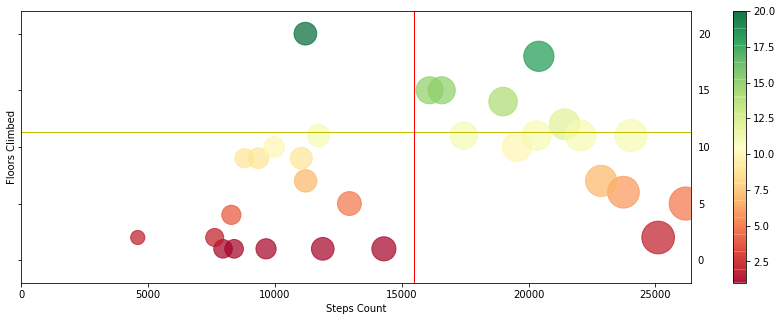

In [84]:
plt.figure(1,figsize=(15,5))

x = master_fns_df['count_sum'] 
y = master_fns_df['floor_sum']

plt.xlabel('Steps Count')
plt.ylabel('Floors Climbed')
plt.xlim(-5,master_fns_df['count_sum'].max()+200)
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.ylim(-2,master_fns_df['floor_sum'].max()+2)
plt.grid(b=False)
plt.axhline(y=avgval2, linewidth=1, color='y')
plt.axvline(x=avgval, linewidth=1, color='r')

sc = plt.scatter(x, y, alpha=0.7,c=master_fns_df['floor_sum'], s=master_fns_df['calorie_sum'], cmap='RdYlGn')
plt.colorbar(sc)

#### The number of floors climbed is usually higer on the days with greater step counts and so is the calories burnt

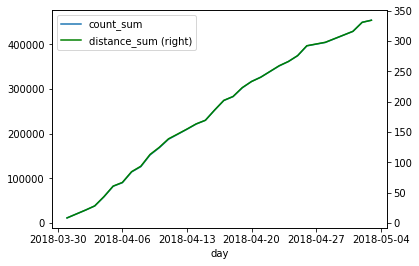

In [81]:
#Cumulative Charts

cumulative = master_fns_df[['day','count_sum','distance_sum','floor_sum']].copy()
cumulative.set_index('day', inplace=True)
cumulative['distance_sum'] = cumulative['distance_sum']
cumulative = cumulative.cumsum(axis=0, skipna=True)
cumulative = cumulative.fillna(method='ffill')
fig, ax = plt.subplots(1, 1)
cumulative['count_sum'].plot(ax=ax, legend = True)
cumulative['distance_sum'].plot(secondary_y=True, ax=ax, style='g', legend=True)

#### Above plot shows cumualtive plot and cumulative distace covered between March and May. The two are strongly correlated and completely overlap when we plot it on primary and secondary axes!

In [82]:
#matrix charts histograms steps done per month
matrixdata = master_fns_df[['day','count_sum','distance_sum','floor_sum', 'calorie_sum']].copy()
dd = matrixdata['day']
matrixdata['month'] = dd.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month, na_action = 'ignore')
matrixdata['year'] = dd.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).year, na_action = 'ignore')
matrixdata['distance_sum'] = matrixdata['distance_sum']
matrixdata.head()

,day,count_sum,distance_sum,floor_sum,calorie_sum,month,year
0,2018-03-31,11039,8.079278,9.0,476.101001,3,2018
1,2018-04-02,17441,12.911610,11.0,748.368988,4,2018
2,2018-04-03,9345,6.909308,9.0,433.487997,4,2018
3,2018-04-04,20404,15.286600,18.0,913.739992,4,2018
4,2018-04-05,23740,17.386851,6.0,1011.309987,4,2018


#### Matrix charts histograms steps done per month

In [83]:
matrixdata = master_fns_df[['day','count_sum','distance_sum','floor_sum', 'calorie_sum']].copy()
dd = matrixdata['day']
matrixdata['month'] = dd.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).month, na_action = 'ignore')
matrixdata['year'] = dd.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).year, na_action = 'ignore')
matrixdata['distance_sum'] = matrixdata['distance_sum']
matrixdata.head()

,day,count_sum,distance_sum,floor_sum,calorie_sum,month,year
0,2018-03-31,11039,8.079278,9.0,476.101001,3,2018
1,2018-04-02,17441,12.911610,11.0,748.368988,4,2018
2,2018-04-03,9345,6.909308,9.0,433.487997,4,2018
3,2018-04-04,20404,15.286600,18.0,913.739992,4,2018
4,2018-04-05,23740,17.386851,6.0,1011.309987,4,2018


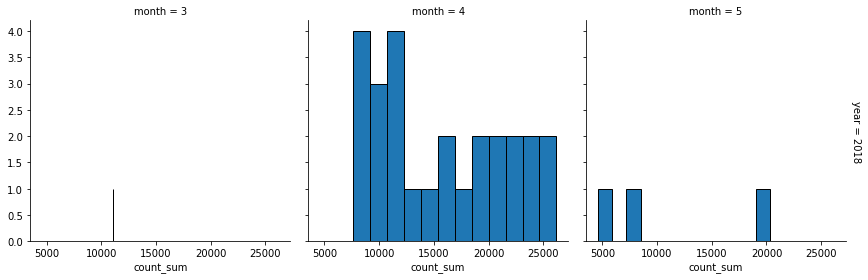

In [84]:
g = sns.FacetGrid(matrixdata, row="year", col="month", size=4, margin_titles=True)
g.map(plt.hist, "count_sum", bins=12, edgecolor = 'black')

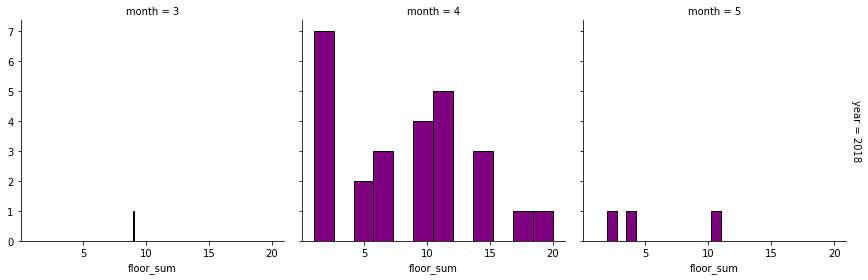

In [85]:
g = sns.FacetGrid(matrixdata, row="year", col="month", size=4, margin_titles=True)
g.map(plt.hist, 'floor_sum', bins=12, color="purple", edgecolor = 'black')

#### April is the most active month. But, that is because we have fewer datapoints for the month of March and May!

#### Matrix charts by weekdays

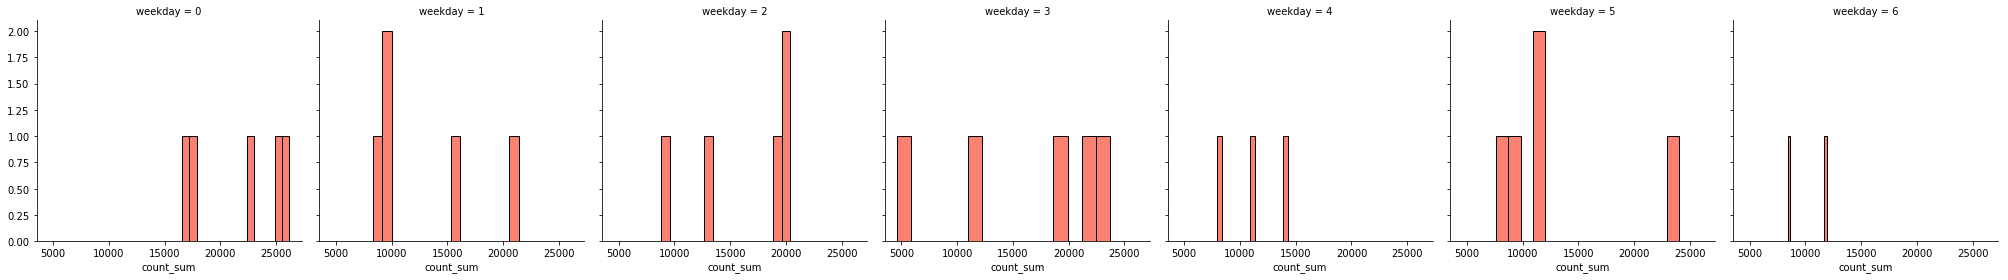

In [86]:
matrixdata['weekday'] = dd.map(lambda x: (datetime.strptime(str(x),"%Y-%m-%d")).weekday(), na_action = 'ignore')
matrixdata = matrixdata.sort_values("weekday")
g = sns.FacetGrid(matrixdata, col="weekday", size=4, margin_titles=True)
g.map(plt.hist, "count_sum", bins=15, color="salmon", edgecolor='black')

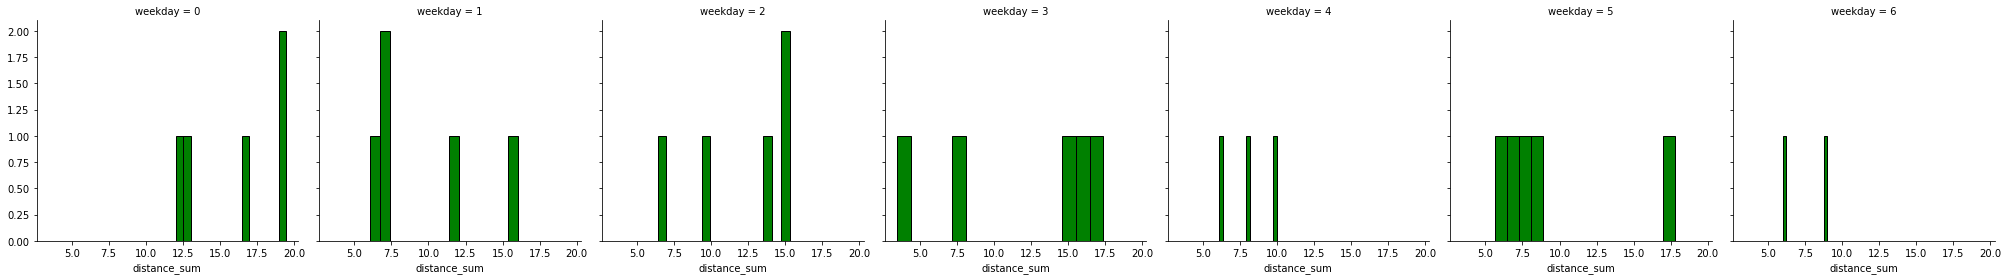

In [87]:
g = sns.FacetGrid(matrixdata, col="weekday", size=4, margin_titles=True)
g.map(plt.hist, "distance_sum", bins=15, color="g", edgecolor='black')

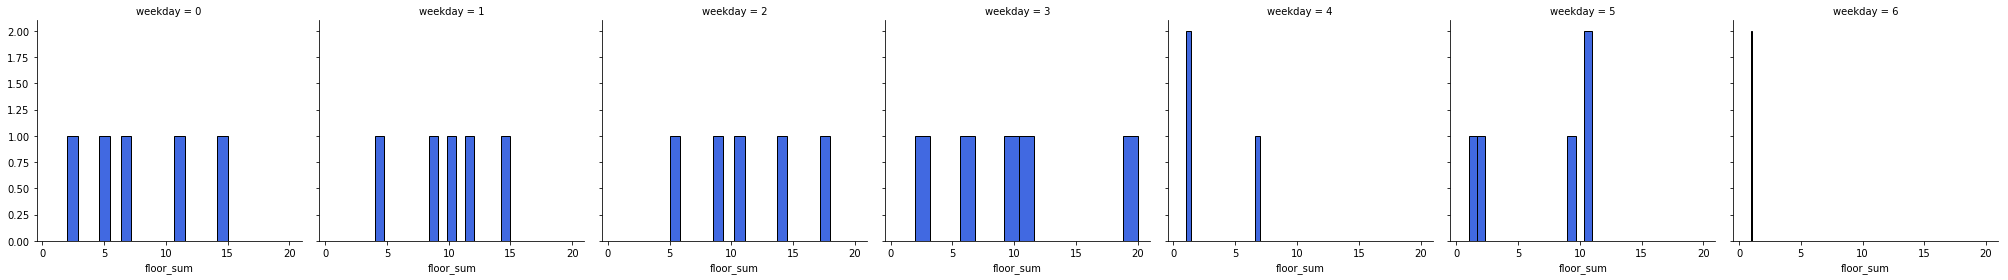

In [88]:
g = sns.FacetGrid(matrixdata, col="weekday", size=4, margin_titles=True)
g.map(plt.hist, "floor_sum", bins=15, color="royalblue", edgecolor='black')

#### Monday is most active (higher number of step counts). We has drawn the same conclusion based on the summary table earlier. The plot conforms that!

([<matplotlib.axis.XTick at 0x1ccc17eea20>,
 <a list of 7 Text xticklabel objects>)

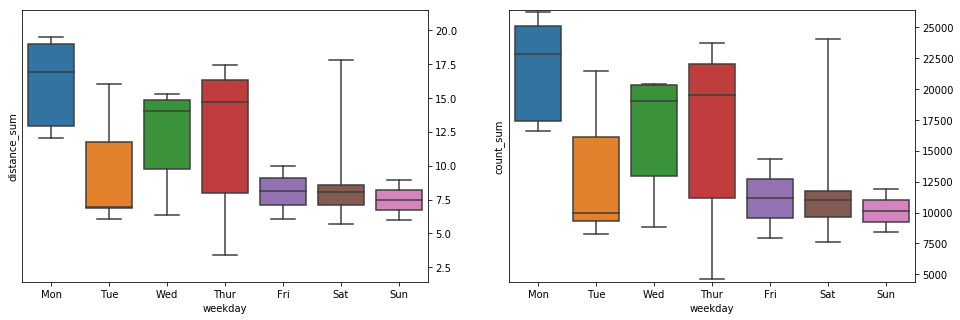

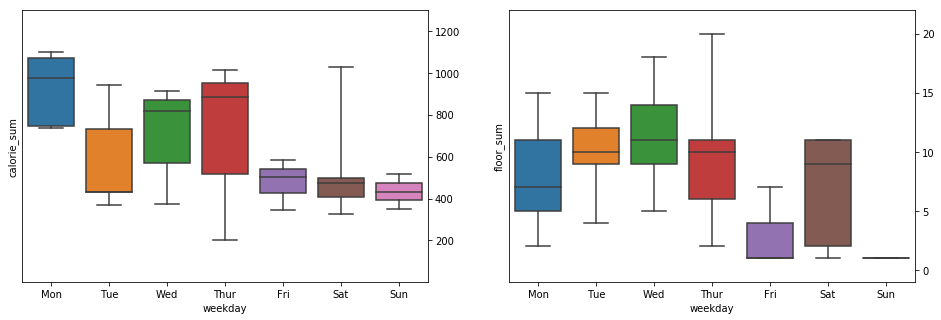

In [89]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x=matrixdata["weekday"], y=matrixdata["distance_sum"], whis=[0,100])
ax5.set_ylim(matrixdata["distance_sum"].min()-2,matrixdata["distance_sum"].max()+2)
ax5.set_xticklabels(matrixdata['weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.subplot(122)
ax5 = sns.boxplot(x=matrixdata["weekday"], y=matrixdata["count_sum"], whis=[0,100])
ax5.set_ylim(matrixdata["count_sum"].min()-200,matrixdata["count_sum"].max()+200)
ax5.set_xticklabels(matrixdata['weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.figure(2,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x=matrixdata["weekday"], y=matrixdata["calorie_sum"], whis=[0,100])
ax5.set_ylim(matrixdata['calorie_sum'].min()-200,matrixdata['calorie_sum'].max()+200)
ax5.set_xticklabels(matrixdata['weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.subplot(122)
ax5 = sns.boxplot(x=matrixdata["weekday"], y=matrixdata["floor_sum"], whis=[0,100])
ax5.set_ylim(matrixdata["floor_sum"].min()-2,matrixdata["floor_sum"].max()+2)
ax5.set_xticklabels(matrixdata["weekday"].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

#### Observations
- Monday is more active in terms of step counts, calories and distance
- The person climbs the most stairs on Wedneday

#### Now let's look at the persons behaviors by hours of the day (intraday behaviour)

In [90]:
steps_intraday = step_df.sort_values("hour")
steps_intraday.head()

,end_time,start_time,count,calorie,update_time,speed,time_offset,distance,datauuid,create_time,weekday,day,month,hour
7672,2018-04-01 00:40:00.000,2018-04-01 00:39:00,24,1.00,2018-04-01 00:40:16.281,1.777778,UTC-0300,19.810,c8ddcfea-373a-404a-9461-b2a751bc530e,2018-04-01 00:40:16.281,6,2018-04-01,4,0
3688,2018-04-01 00:40:59.999,2018-04-01 00:40:00,59,2.38,2018-04-01 00:44:27.624,1.554234,UTC-0300,44.854,6198b916-043a-d3da-4c5f-ab6b6ca9353f,2018-04-01 00:40:00.217,6,2018-04-01,4,0
5149,2018-04-01 00:08:59.999,2018-04-01 00:08:00,100,4.16,2018-04-01 00:15:02.313,1.250000,UTC-0300,71.210,866c3fa3-56f9-6a65-dade-e6d13afecc9a,2018-04-01 00:15:02.313,6,2018-04-01,4,0
1760,2018-04-01 00:09:59.999,2018-04-01 00:09:00,28,1.16,2018-04-01 00:15:02.326,1.305556,UTC-0300,20.400,2d0d942c-5925-ef37-2c73-4ca9df1a43e5,2018-04-01 00:15:02.326,6,2018-04-01,4,0
7391,2018-04-01 00:42:59.999,2018-04-01 00:42:00,41,1.68,2018-04-01 00:44:27.679,1.527778,UTC-0300,30.620,c1a5aafb-3af7-6e6c-e187-a16112e3cba5,2018-04-01 00:44:27.679,6,2018-04-01,4,0


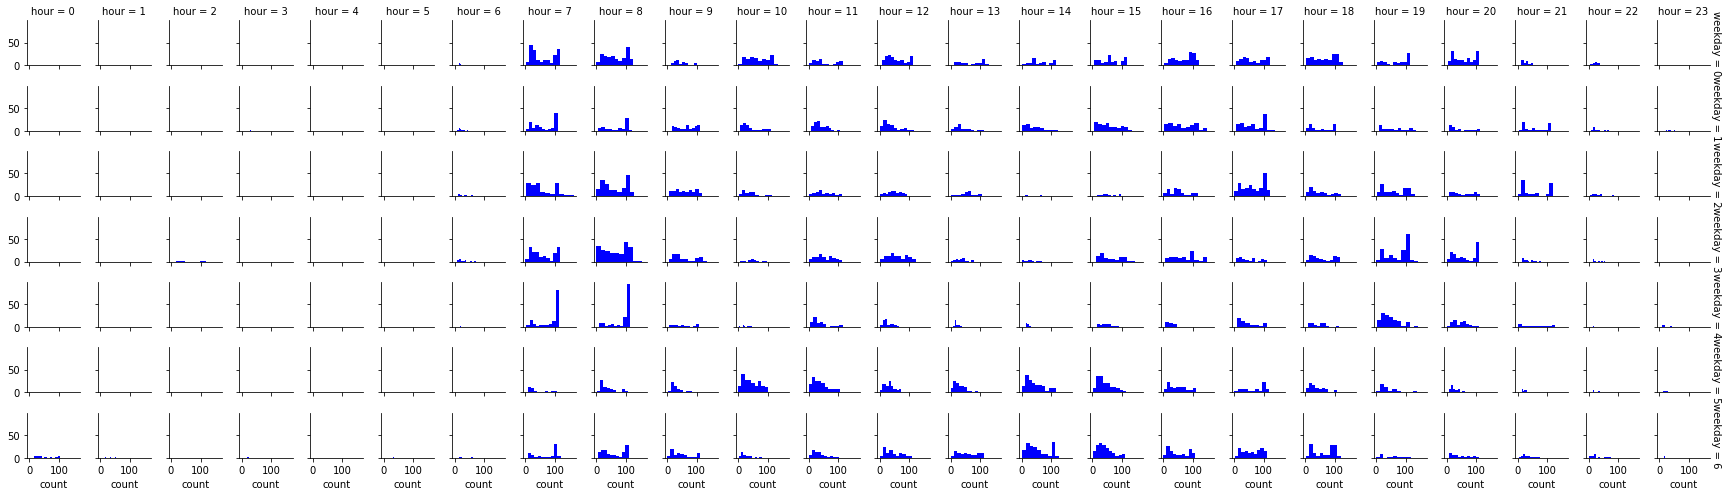

In [91]:
g = sns.FacetGrid(steps_intraday, row="weekday", col="hour", size=1, margin_titles=True)
g.map(plt.hist, "count", bins=10, color="blue")

#### Observations
- Mornings and evenings have greater number of observations during the day on Weekdays
- Afternoons have greater number of observations during the Weekends

#### Average steps per hour per day

In [92]:
steps_avg = pd.pivot_table(steps_intraday, index=["hour"], columns = ['weekday'], aggfunc=np.mean)
steps_avg

calorie                                                              \
weekday         0         1         2         3         4         5         6   
hour                                                                            
0        0.550000       NaN       NaN  0.650000       NaN       NaN  2.131053   
1             NaN       NaN       NaN  0.610000  0.540000       NaN  1.310000   
2        0.915000  0.970000  1.130000  2.606000  1.030000  1.290000       NaN   
3             NaN  0.955000  1.015500       NaN       NaN  0.946667  1.200000   
4             NaN  0.730000       NaN  0.610000  1.065000  1.068000  0.670000   
5        1.410333  0.757500  0.540000  0.690000  0.326667  1.110000  1.200000   
6        0.894000  0.972857  1.340474  1.146000  0.922857  1.033333  1.112000   
7        2.531589  2.756236  2.623121  2.572738  3.386872  1.818571  2.992344   
8        2.800640  3.230397  2.807495  2.823028  3.611353  1.759750  2.457895   
9        2.037380  2.740617  2.587672  2.432267  2.144412  1.376968  1.935129   
10       2.934159  2.114203  1.714839  2.110476  1.096818  1.951905  0.995143   
11       2.247514  1.625920  2.204242  2.122500  1.544443  1.654939  1.364615   
12       2.310896  1.672644  2.040759  2.401982  1.194687  1.394206  1.888255   
13       3.055254  1.694565  2.493261  1.467059  1.080303  1.349620  2.366789   
14       2.637424  1.794219  1.837778  1.076667  0.960455  1.912333  2.322139   
15       2.700555  2.431757  2.232000  2.778848  1.986750  1.811626  1.820357   
16       3.051184  3.296372  2.119551  3.719318  1.373871  2.051299  2.062883   
17       2.687177  2.957297  2.836333  1.907872  2.741818  2.877945  2.483948   
18       2.780739  2.279152  2.144118  2.685208  1.911578  1.745629  2.582113   
19       3.225871  2.944771  2.634405  3.556433  2.118028  1.868600  2.121363   
20       2.349735  1.848500  2.595079  2.511048  1.917375  1.211071  1.741219   
21       1.429286  2.416000  2.472400  1.318182  2.594194  0.986296  1.309656   
22       1.329310  1.102000  1.509583  1.133250  0.764286  1.038643  1.045789   
23       0.755000  1.373625  1.843333       NaN  1.207778  1.534000  0.816000   

             count                          ...    month                 \
weekday          0          1          2    ...        4         5    6   
hour                                        ...                           
0        15.000000        NaN        NaN    ...      NaN       NaN  4.0   
1              NaN        NaN        NaN    ...      4.0       NaN  4.0   
2        19.500000  24.000000  26.000000    ...      4.0  4.000000  NaN   
3              NaN  23.500000  27.500000    ...      NaN  4.000000  4.0   
4              NaN  17.000000        NaN    ...      4.0  4.000000  4.0   
5        36.000000  18.500000  13.666667    ...      4.0  4.000000  4.0   
6        22.066667  24.142857  32.052632    ...      4.0  4.000000  4.0   
7        57.936842  65.528302  57.177305    ...      4.0  3.571429  4.0   
8        66.428571  72.561644  64.127660    ...      4.0  3.550000  4.0   
9        47.120000  66.135802  61.577586    ...      4.0  3.888889  4.0   
10       67.401515  42.115942  40.232143    ...      4.0  3.810000  4.0   
11       51.125000  38.636364  50.484848    ...      4.0  3.682927  4.0   
12       55.298611  37.724138  47.924051    ...      4.0  3.690476  4.0   
13       71.271186  39.369565  58.804348    ...      4.0  3.870370  4.0   
14       61.924242  40.812500  46.444444    ...      4.0  3.982143  4.0   
15       62.287037  54.626168  53.360000    ...      4.0  3.981928  4.0   
16       70.750000  65.424779  50.168539    ...      4.0  3.962617  4.0   
17       62.435484  66.288136  65.542857    ...      4.0  3.986301  4.0   
18       66.254658  52.779661  49.105882    ...      4.0  3.752809  4.0   
19       70.764706  60.833333  59.844828    ...      4.0  3.640000  4.0   
20       57.165563  43.225000  57.777778    ...      4.0  3.642857  4.0   
21       33.523810  56

Text(0.5,1,'Sunday')

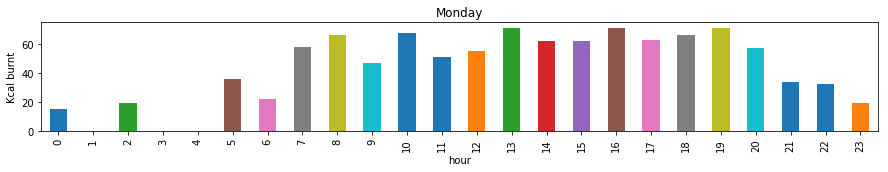

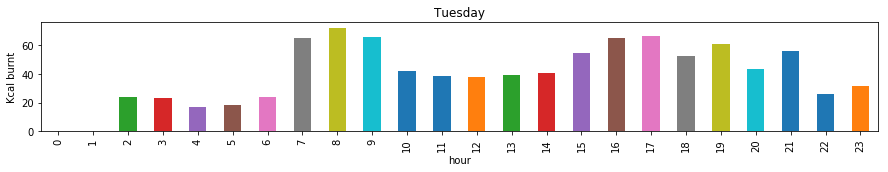

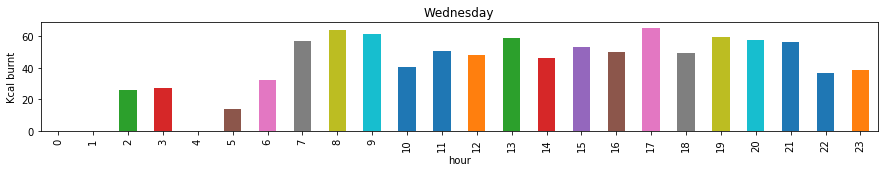

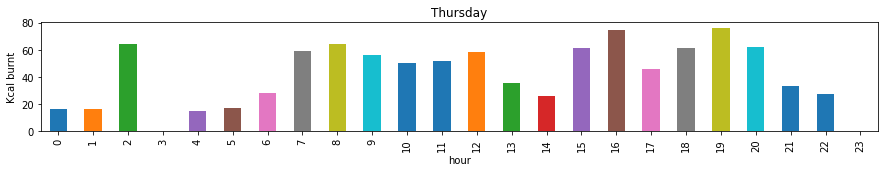

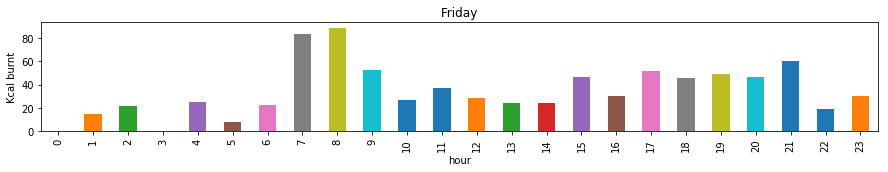

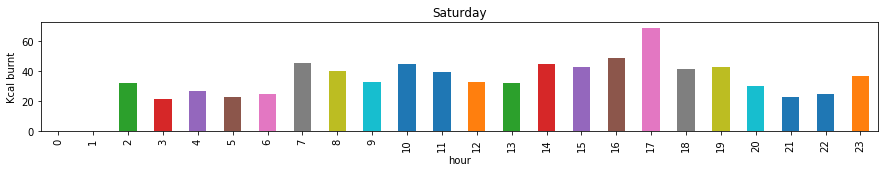

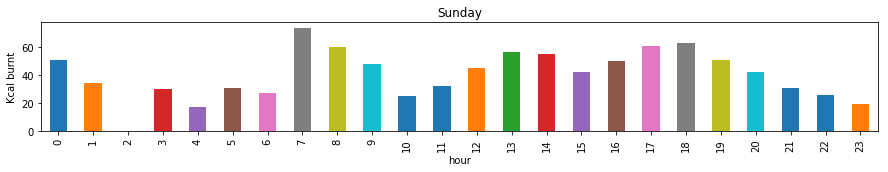

In [93]:
a = steps_avg.transpose()
plt.figure(figsize=(15,2))
a.ix["count"].ix[0].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Monday')
plt.figure(figsize=(15,2))
a.ix["count"].ix[1].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Tuesday')
plt.figure(figsize=(15,2))
a.ix["count"].ix[2].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Wednesday')
plt.figure(figsize=(15,2))
a.ix["count"].ix[3].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Thursday')
plt.figure(figsize=(15,2))
a.ix["count"].ix[4].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Friday')
plt.figure(figsize=(15,2))
a.ix["count"].ix[5].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Saturday')
plt.figure(figsize=(15,2))
a.ix["count"].ix[6].plot.bar()
plt.ylabel('Kcal burnt')
plt.title('Sunday')

#### Observations
- Mornings and evenings are most active times (higher step counts) during the day on Weekdays
- Afternoons are the most active time ((higher step counts)) during the Weekends

### 4.2. Sleep and Exercise Data

In [94]:
master_sne_df = pd.merge(sleep_df_grp.reset_index(drop=True), exercise_df_grp.reset_index(drop=True), on='day', how = 'inner')
master_sne_df.head()

,day,duration_count,duration_mean,duration_median,duration_max,duration_min,efficiency_count,efficiency_mean,efficiency_median,efficiency_max,efficiency_min,calorie_sum,distance_sum,duration_sum
0,2017-12-18,1,491.0,491.0,491.0,491.0,1,96.341460,96.341460,96.341460,96.341460,113.670,1684.150,25.682383
1,2017-12-20,1,293.0,293.0,293.0,293.0,1,93.174065,93.174065,93.174065,93.174065,140.400,2205.440,38.262733
2,2017-12-24,1,526.0,526.0,526.0,526.0,1,94.117645,94.117645,94.117645,94.117645,553.224,4420.025,61.963850
3,2017-12-26,2,251.0,251.0,389.0,113.0,2,90.323890,90.323890,92.051280,88.596500,57.180,987.061,16.576617
4,2017-12-29,1,495.0,495.0,495.0,495.0,1,90.120964,90.120964,90.120964,90.120964,367.376,0.000,69.063500


In [95]:
master_sne_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 14 columns):
day                  92 non-null object
duration_count       92 non-null int64
duration_mean        92 non-null float64
duration_median      92 non-null float64
duration_max         92 non-null float64
duration_min         92 non-null float64
efficiency_count     92 non-null int64
efficiency_mean      92 non-null float64
efficiency_median    92 non-null float64
efficiency_max       92 non-null float64
efficiency_min       92 non-null float64
calorie_sum          92 non-null float64
distance_sum         92 non-null float64
duration_sum         92 non-null float64
dtypes: float64(11), int64(2), object(1)
memory usage: 10.8+ KB


#### Matrix charts histograms sleep data per month

In [96]:
import datetime as datetime
matrixdata_sleep = master_sne_df[['day','duration_count','duration_mean','efficiency_count',\
                                  'efficiency_mean', 'calorie_sum', 'distance_sum', 'duration_sum']].copy()
dd = matrixdata_sleep['day']
dd = pd.to_datetime(dd)
matrixdata_sleep['month'] = dd.dt.month
matrixdata_sleep['year'] = dd.dt.year
matrixdata_sleep['distance_sum'] = matrixdata_sleep['distance_sum']/1000
matrixdata_sleep.head()

,day,duration_count,duration_mean,efficiency_count,efficiency_mean,calorie_sum,distance_sum,duration_sum,month,year
0,2017-12-18,1,491.0,1,96.341460,113.670,1.684150,25.682383,12,2017
1,2017-12-20,1,293.0,1,93.174065,140.400,2.205440,38.262733,12,2017
2,2017-12-24,1,526.0,1,94.117645,553.224,4.420025,61.963850,12,2017
3,2017-12-26,2,251.0,2,90.323890,57.180,0.987061,16.576617,12,2017
4,2017-12-29,1,495.0,1,90.120964,367.376,0.000000,69.063500,12,2017


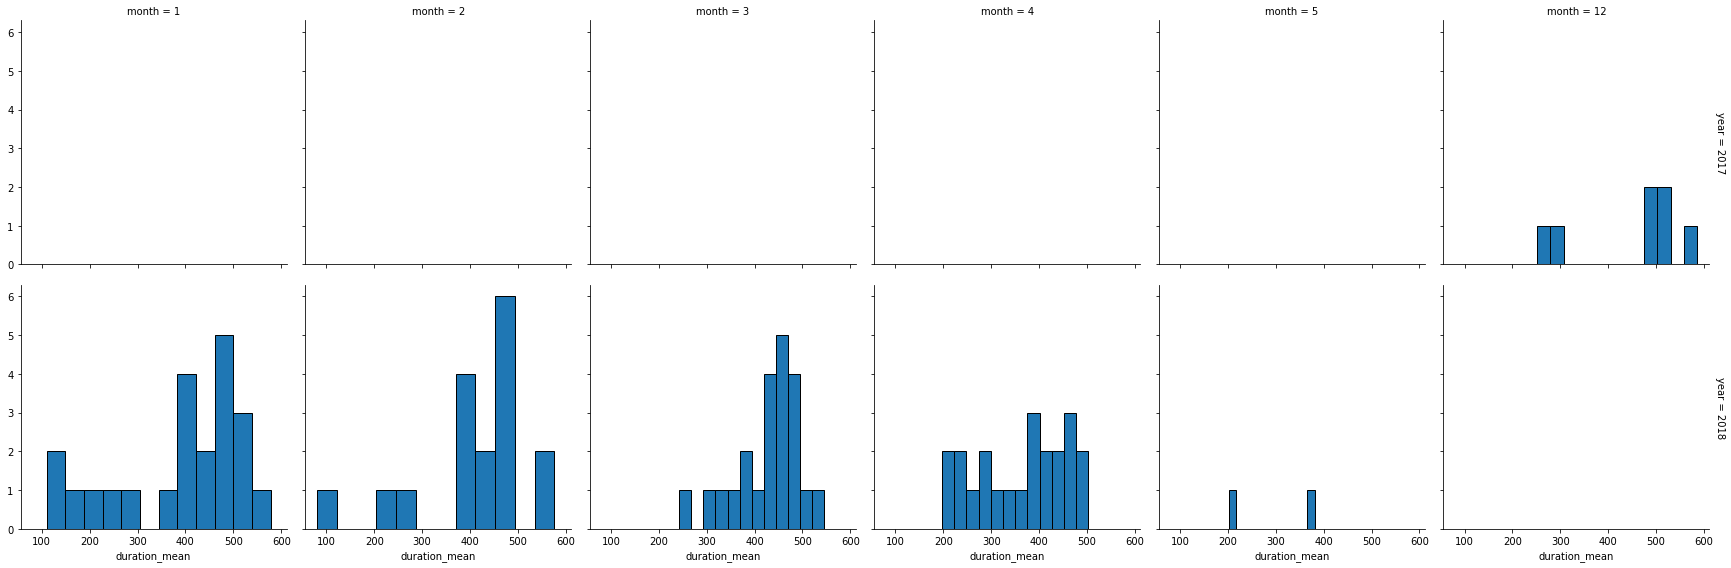

In [97]:
g = sns.FacetGrid(matrixdata_sleep, row="year", col="month", size=4, margin_titles=True)
g.map(plt.hist, "duration_mean", bins=12, edgecolor = 'black')

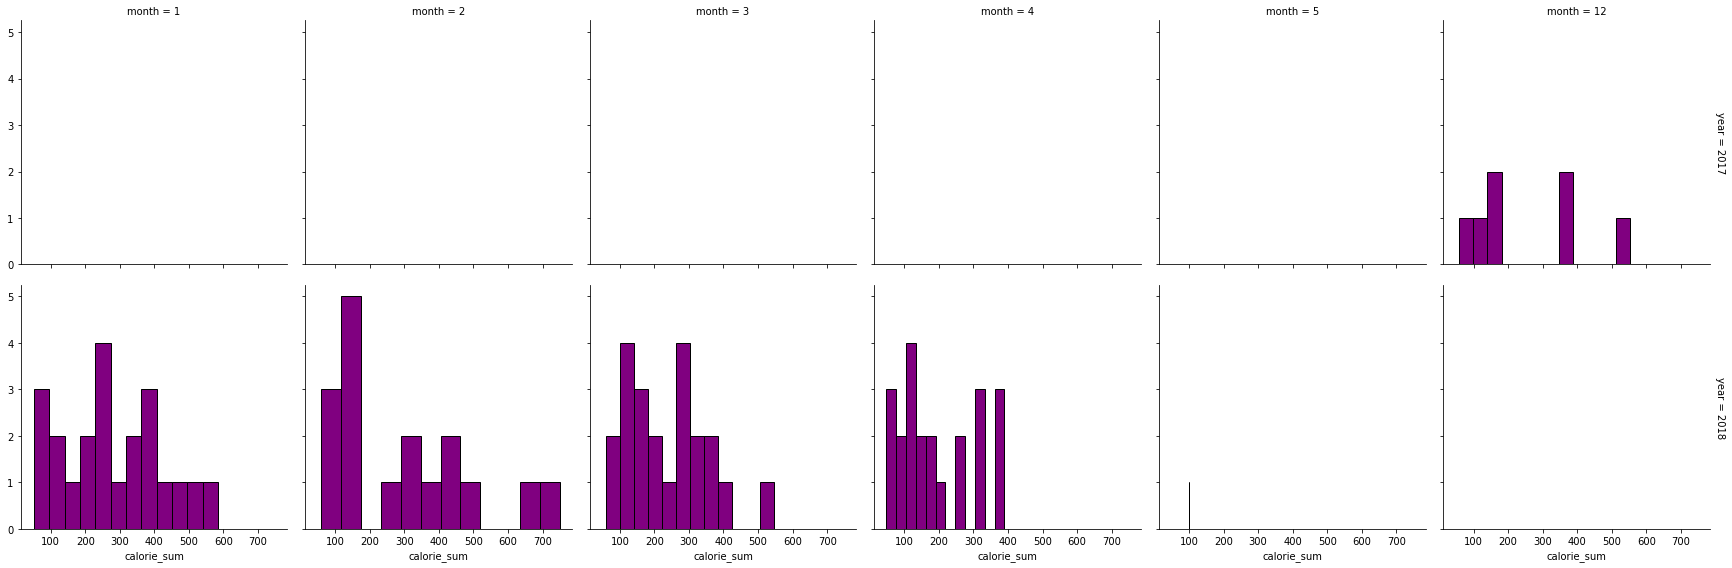

In [98]:
g = sns.FacetGrid(matrixdata_sleep, row="year", col="month", size=4, margin_titles=True)
g.map(plt.hist, 'calorie_sum', bins=12, color="purple", edgecolor = 'black')

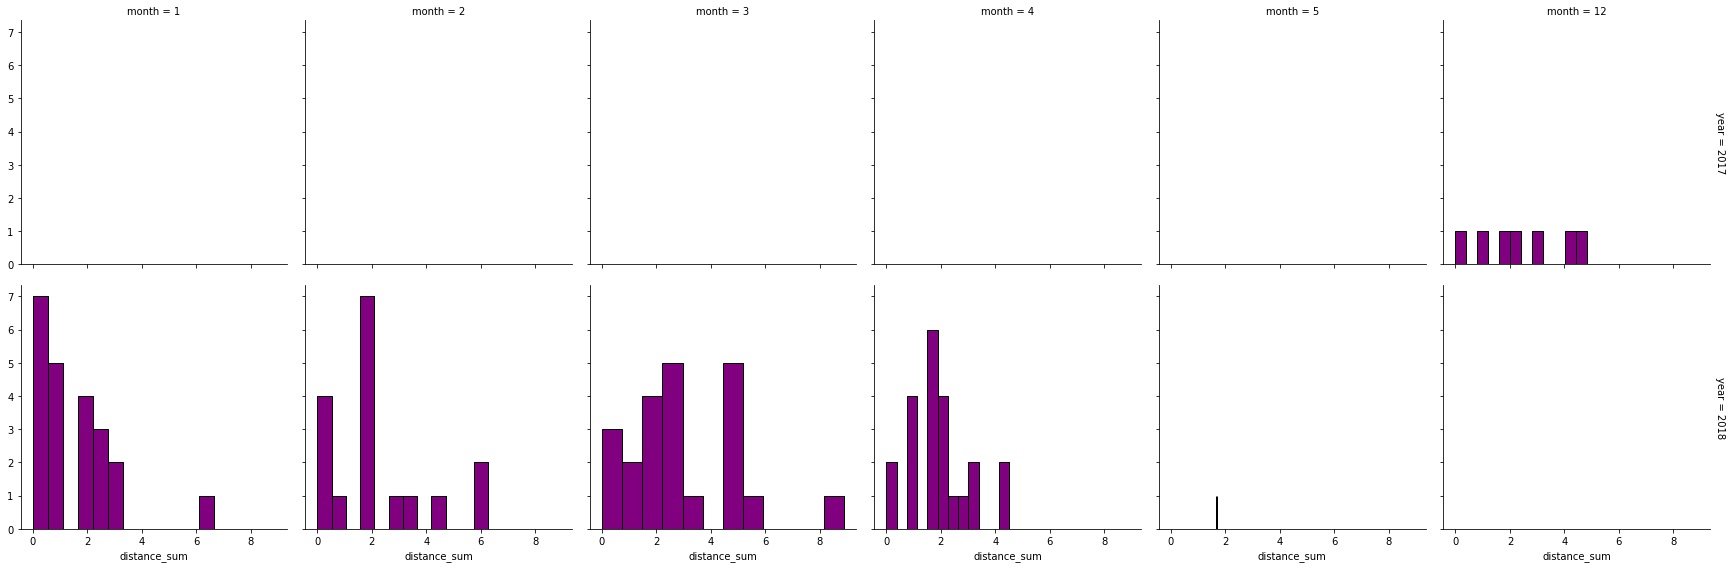

In [99]:
g = sns.FacetGrid(matrixdata_sleep, row="year", col="month", size=4, margin_titles=True)
g.map(plt.hist, 'distance_sum', bins=12, color="purple", edgecolor = 'black')

#### Observations
- Most of the data for sleep and exercise is present for the months of Dec 2017 to April 2018 for the combined dataset
- There are some very short sleep duration which are probably naps (we will explore this further in a moment!)

#### Matrix charts by weekdays

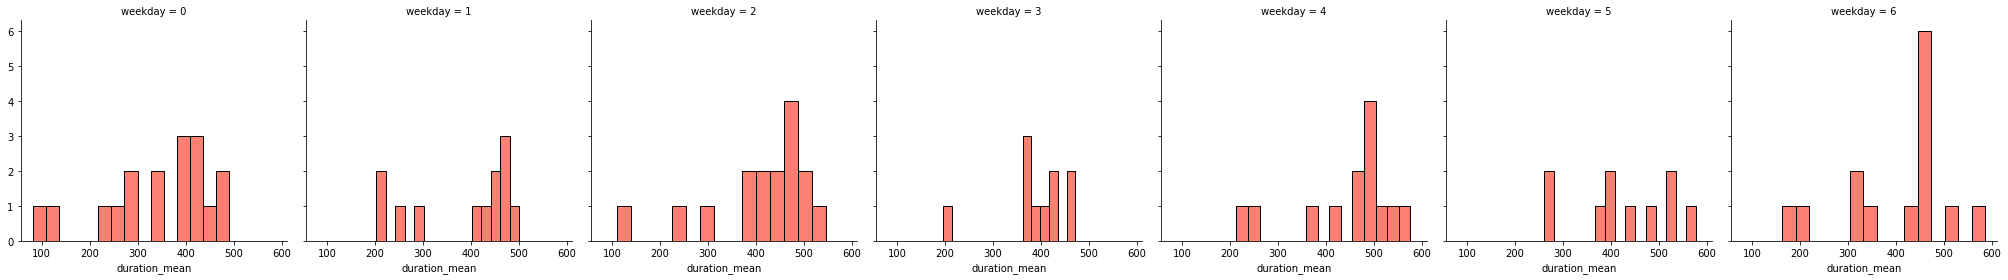

In [100]:
matrixdata_sleep['weekday'] = dd.dt.weekday
matrixdata_sleep = matrixdata_sleep.sort_values("weekday")
g = sns.FacetGrid(matrixdata_sleep, col="weekday", size=4, margin_titles=True)
g.map(plt.hist, "duration_mean", bins=15, color="salmon", edgecolor='black')

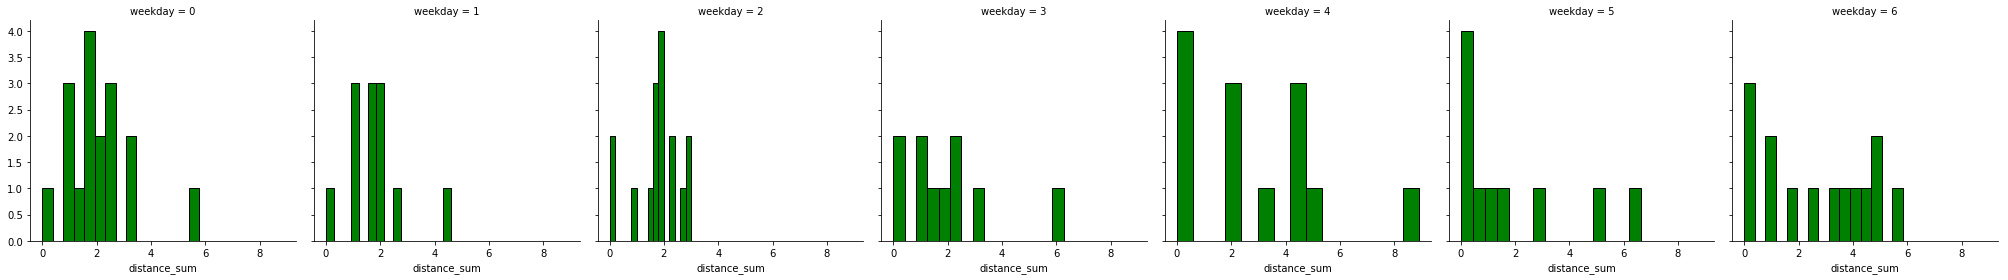

In [101]:
g = sns.FacetGrid(matrixdata_sleep, col="weekday", size=4, margin_titles=True)
g.map(plt.hist, "distance_sum", bins=15, color="g", edgecolor='black')

([<matplotlib.axis.XTick at 0x1cccd44d6d8>,
 <a list of 7 Text xticklabel objects>)

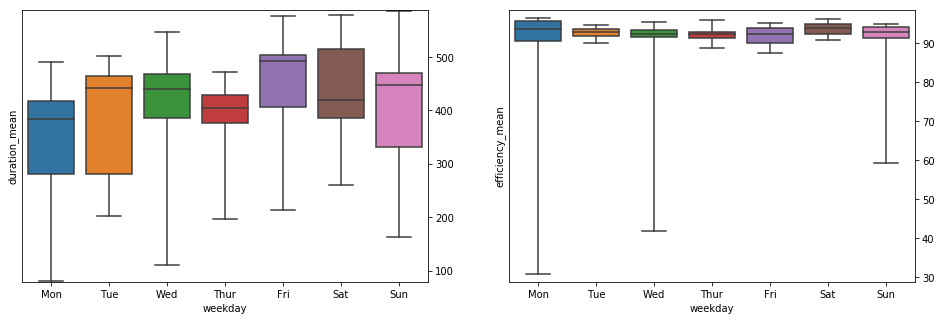

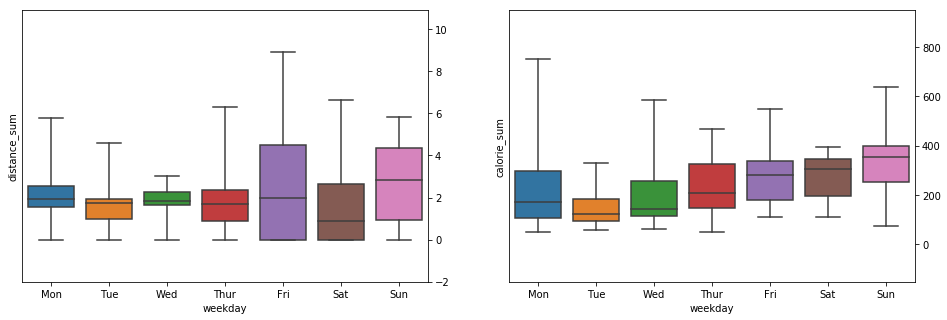

In [102]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x=matrixdata_sleep["weekday"], y=matrixdata_sleep["duration_mean"], whis=[0,100])
ax5.set_ylim(matrixdata_sleep["duration_mean"].min()-2,matrixdata_sleep["duration_mean"].max()+2)
ax5.set_xticklabels(matrixdata_sleep['weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.subplot(122)
ax5 = sns.boxplot(x=matrixdata_sleep["weekday"], y=matrixdata_sleep["efficiency_mean"], whis=[0,100])
ax5.set_ylim(matrixdata_sleep["efficiency_mean"].min()-2,matrixdata_sleep["efficiency_mean"].max()+2)
ax5.set_xticklabels(matrixdata_sleep["weekday"].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.figure(2,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x=matrixdata_sleep["weekday"], y=matrixdata_sleep["distance_sum"], whis=[0,100])
ax5.set_ylim(matrixdata_sleep['distance_sum'].min()-2,matrixdata_sleep['distance_sum'].max()+2)
ax5.set_xticklabels(matrixdata_sleep['weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

plt.subplot(122)
ax5 = sns.boxplot(x=matrixdata_sleep["weekday"], y=matrixdata_sleep["calorie_sum"], whis=[0,100])
ax5.set_ylim(matrixdata_sleep["calorie_sum"].min()-200,matrixdata_sleep["calorie_sum"].max()+200)
ax5.set_xticklabels(matrixdata_sleep['weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
plt.xticks(list(range(7)),['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])

#### Observations
- The persons seems to exercise the most (calories burnt) during the later parts of the week (Wednesday through Sunday)
- The mean sleep duration is the highest on Fridays and Saturdays and the lowest on Mondays

#### Now let's look at the persons behaviors by hours of the day (intraday behaviour)

In [103]:
sleep_intraday = sleep_df
sleep_intraday['hour'] = sleep_intraday['start_time'].dt.hour
sleep_intraday.sort_values("hour")
sleep_intraday.head()

,efficiency,has_sleep_data,datauuid,end_time,start_time,time_offset,update_time,create_time,duration,weekday,day,month,sleep_start_hr,wake_hour,hour
0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,2018-03-08 09:30:00,2018-03-08 03:23:00,UTC-0400,2018-03-08 13:39:58.387,2018-03-08 09:32:02.181,367.0,3,2018-03-08,3,3.383333,9.500000,3
1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,2018-02-25 13:28:00,2018-02-25 06:15:00,UTC-0400,2018-02-25 13:30:16.332,2018-02-25 13:30:16.332,433.0,6,2018-02-25,2,6.250000,13.466667,6
2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,2018-06-02 09:49:00,2018-06-02 03:37:00,UTC-0300,2018-06-02 09:49:32.094,2018-06-02 09:49:32.094,372.0,5,2018-06-02,6,3.616667,9.816667,3
3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,2018-06-23 10:32:00,2018-06-23 06:39:00,UTC-0300,2018-06-23 10:47:26.337,2018-06-23 10:47:26.337,233.0,5,2018-06-23,6,6.650000,10.533333,6
4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,2018-01-05 13:41:00,2018-01-05 04:54:00,UTC-0400,2018-01-05 13:44:59.850,2018-01-05 13:44:59.850,527.0,4,2018-01-05,1,4.900000,13.683333,4


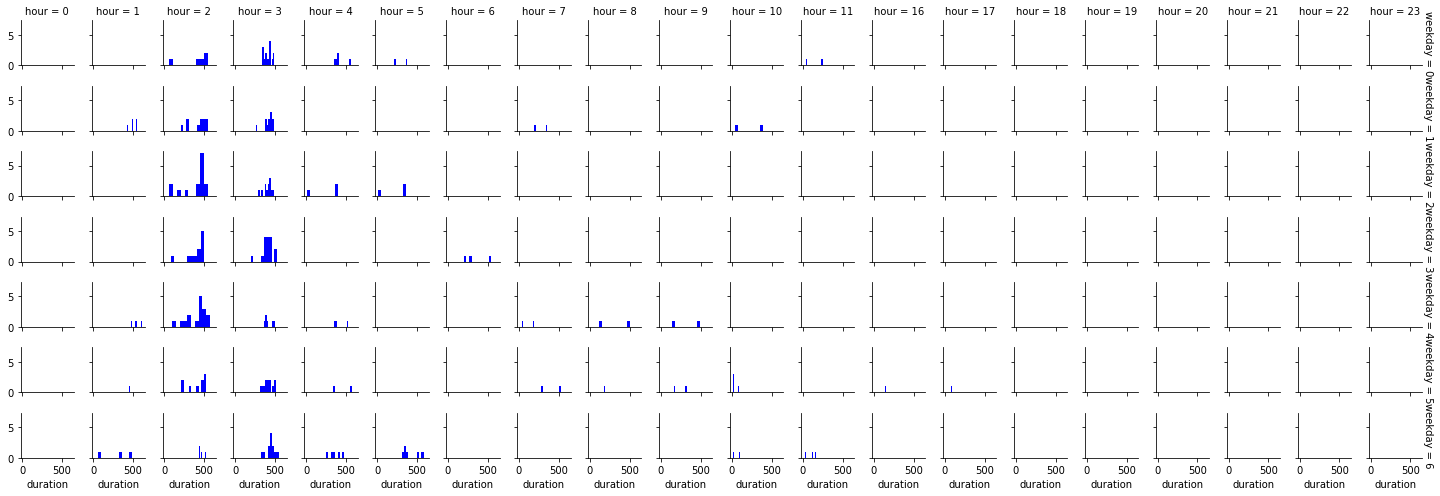

In [104]:
g = sns.FacetGrid(sleep_intraday, row="weekday", col="hour", size=1, margin_titles=True)
g.map(plt.hist, "duration", bins=10, color="blue")

#### Observations
- Late nights have greater number of observations 
- There are some observations later in the day which are indicative of the naps the person might be taking

#### Average sleep duration by hour of day per day

Text(0.5,1,'Sunday')

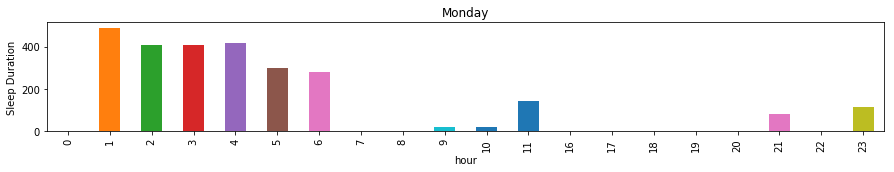

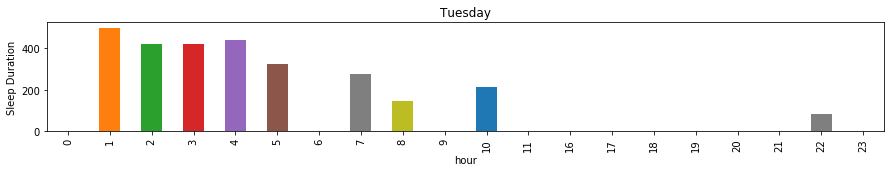

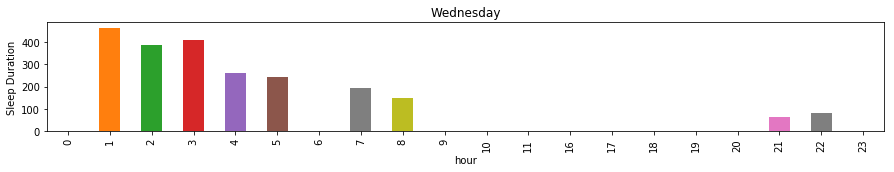

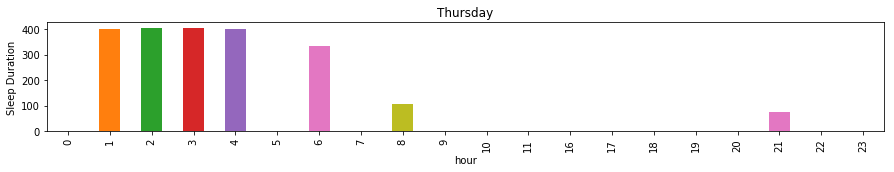

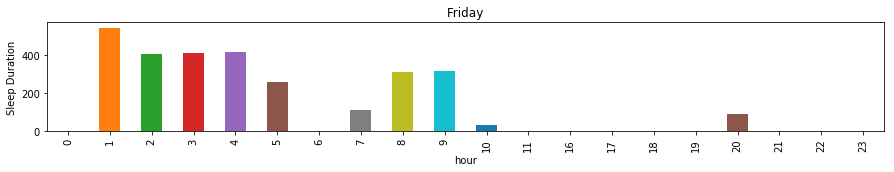

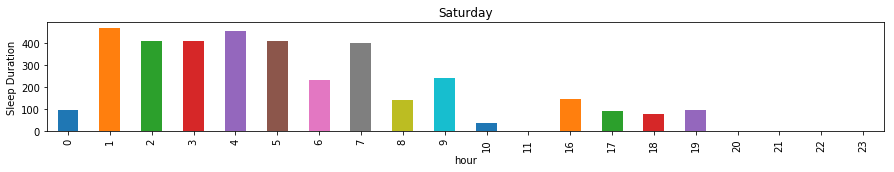

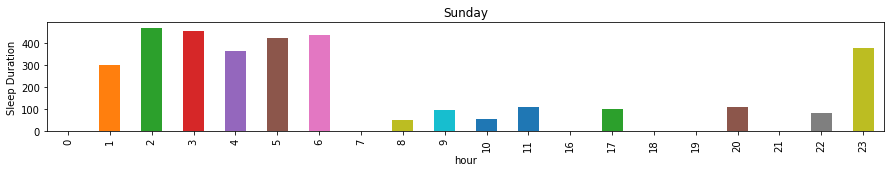

In [105]:
duration_avg = pd.pivot_table(sleep_intraday, index=["hour"], columns = ['weekday'], aggfunc=np.mean)
a = duration_avg.transpose()
plt.figure(figsize=(15,2))
a.ix["duration"].ix[0].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Monday')
plt.figure(figsize=(15,2))
a.ix["duration"].ix[1].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Tuesday')
plt.figure(figsize=(15,2))
a.ix["duration"].ix[2].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Wednesday')
plt.figure(figsize=(15,2))
a.ix["duration"].ix[3].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Thursday')
plt.figure(figsize=(15,2))
a.ix["duration"].ix[4].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Friday')
plt.figure(figsize=(15,2))
a.ix["duration"].ix[5].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Saturday')
plt.figure(figsize=(15,2))
a.ix["duration"].ix[6].plot.bar()
plt.ylabel('Sleep Duration')
plt.title('Sunday')

#### Observations
- The person sleeps quite late in the night 
- The are short naps in the evening hours on the weekend which explains the sleep periods of shorter durations

### 4.3. Sleep, Exercise, Floor and Step Data

### This section summarizes the overall observations and the general lifestyle of the person towards the end

In [106]:
master_df = pd.merge(master_sne_df.reset_index(drop=True), master_fns_df.reset_index(drop=True), on='day', how = 'inner')
master_df.head()

,day,duration_count,duration_mean,duration_median,duration_max,duration_min,efficiency_count,efficiency_mean,efficiency_median,efficiency_max,efficiency_min,calorie_sum_x,distance_sum_x,duration_sum,floor_sum,count_sum,calorie_sum_y,distance_sum_y,speed_mean
0,2018-03-31,1,488.0,488.0,488.0,488.0,1,94.672134,94.672134,94.672134,94.672134,352.825,0.000,66.323950,9.0,11039,476.101001,8.079278,1.461493
1,2018-04-02,1,415.0,415.0,415.0,415.0,1,92.788470,92.788470,92.788470,92.788470,98.550,1539.621,22.458817,11.0,17441,748.368988,12.911610,1.460277
2,2018-04-04,2,235.5,235.5,397.0,74.0,2,89.128070,89.128070,94.472360,83.783780,129.120,1979.230,24.518217,18.0,20404,913.739992,15.286600,1.486114
3,2018-04-05,1,472.0,472.0,472.0,472.0,1,93.023260,93.023260,93.023260,93.023260,193.050,3164.029,49.130150,6.0,23740,1011.309987,17.386851,1.460000
4,2018-04-07,1,393.0,393.0,393.0,393.0,1,94.670050,94.670050,94.670050,94.670050,316.291,1008.610,62.985300,11.0,24035,1026.189991,17.760091,1.450131


In [107]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 19 columns):
day                  22 non-null object
duration_count       22 non-null int64
duration_mean        22 non-null float64
duration_median      22 non-null float64
duration_max         22 non-null float64
duration_min         22 non-null float64
efficiency_count     22 non-null int64
efficiency_mean      22 non-null float64
efficiency_median    22 non-null float64
efficiency_max       22 non-null float64
efficiency_min       22 non-null float64
calorie_sum_x        22 non-null float64
distance_sum_x       22 non-null float64
duration_sum         22 non-null float64
floor_sum            22 non-null float64
count_sum            22 non-null int64
calorie_sum_y        22 non-null float64
distance_sum_y       22 non-null float64
speed_mean           22 non-null float64
dtypes: float64(15), int64(3), object(1)
memory usage: 3.4+ KB


In [108]:
import calmap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
md2 = step_df
md2['day'] = pd.to_datetime(md2['day'])
md2.set_index('day', inplace=True)

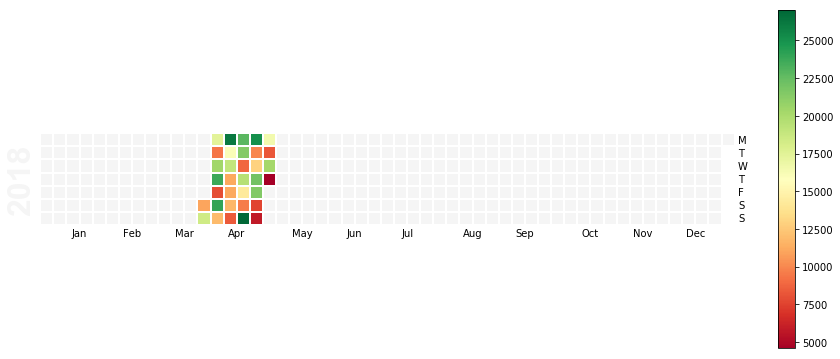

In [110]:
calendar_steps = md2['count']
fig,ax=calmap.calendarplot(calendar_steps, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

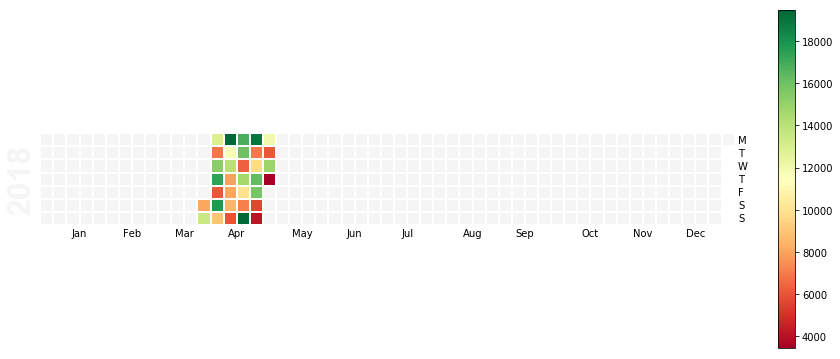

In [111]:
calendar_km = md2['distance']
fig,ax=calmap.calendarplot(calendar_km, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

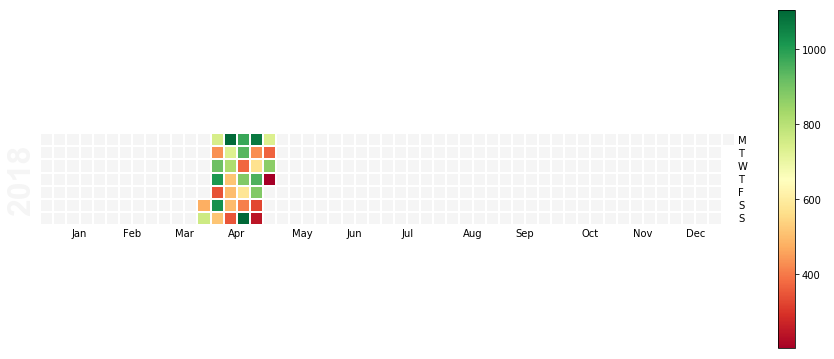

In [112]:
calendar_cals = md2['calorie']
fig,ax=calmap.calendarplot(calendar_cals, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

#### Observations 
- Calendar plot shows that step data is available only for March to May 2018
- Weekdays are more active compared to weekends for step count, calories and distance covered

In [113]:
md3 = floor_df
md3['day'] = pd.to_datetime(md3['day'])
md3.set_index('day', inplace=True)

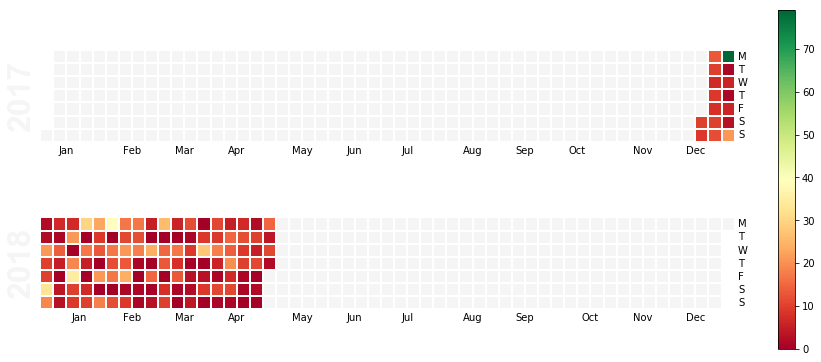

In [114]:
calendar_stairs = md3['floor']
fig,ax=calmap.calendarplot(calendar_stairs, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

#### Observations 
- Calendar plot shows that floor data is available for December 2017 to April 2018
- Lighter patches on the weekday depicts more floors climbed
- Weekends are towards the red end of the colorbar

In [115]:
md4 = heart_rate_df
md4['day'] = pd.to_datetime(md4['day'])
md4.set_index('day', inplace=True)

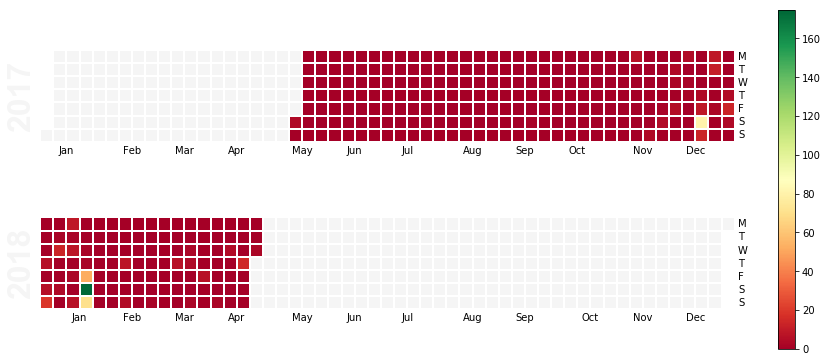

In [116]:
calendar_hr = md4['heart_rate']
fig,ax=calmap.calendarplot(calendar_hr/30, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='RdYlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

#### Observations 
- Calendar plot shows that heart rate data is available for May 2017 to April 2018
- A couple of lighter patches in December and January show more than normal heart rate during this period
- In general the hear rate is in the resting range which is normal

In [117]:
sleep_heat = sleep_df
sleep_heat['day'] = pd.to_datetime(sleep_heat['day'])
sleep_heat.set_index('day', inplace=True)

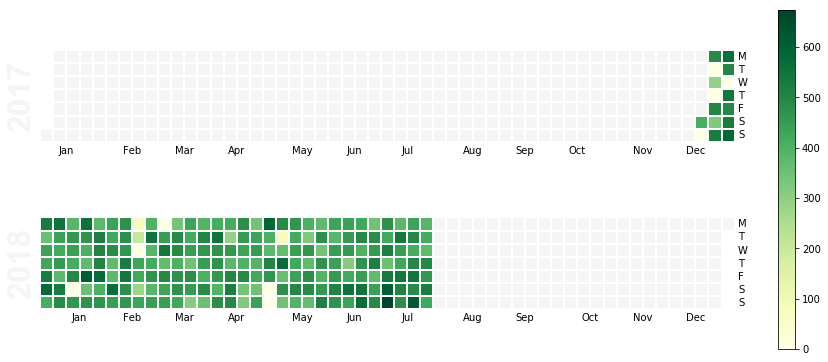

In [118]:
sleep_duration = sleep_heat['duration']
fig,ax=calmap.calendarplot(sleep_duration, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='YlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

#### Observations 
- Calendar plot shows that sleep data is available for Dec 2017 to July 2018
- A couple of lighter patches in show the days when the person was not able to get enough sleep
- In general the sleep duration is towards the green end of the colour bar which means the sleeps quite well

In [119]:
md5 = exercise_df
md5['day'] = pd.to_datetime(md5['day'])
md5.set_index('day', inplace=True)

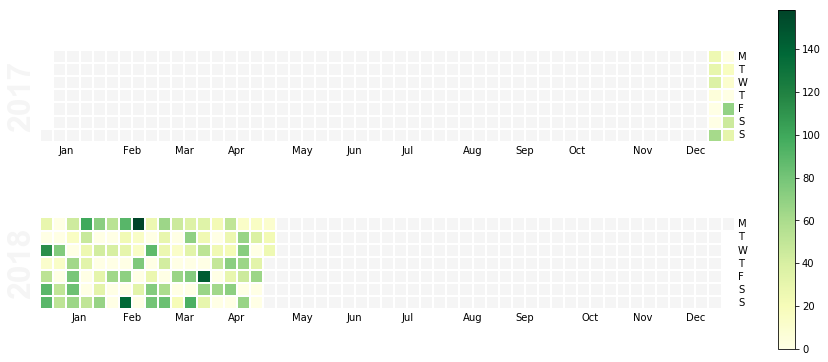

In [120]:
exercise_duration = md5['duration']
fig,ax=calmap.calendarplot(exercise_duration, monthticks=1, daylabels='MTWTFSS',
                    dayticks=[0, 1, 2, 3, 4, 5, 6], cmap='YlGn', linewidth=1,
                    fig_kws=dict(figsize=(13, 5)))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

#### Observations 
- Calendar plot shows that exercise data is available for Dec 2017 to April 2018
- December and April are the months where the person worker out the least
- January to March appear to be the period where the person spends more time in excercise
- The person spends more time working out on Mondays, Fridays and Sundays